In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
import seaborn as sns
import statistics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import itertools
import os

In [2]:
# Load the CSV file into a DataFrame
sales = pd.read_csv(r"/Users/chi-chi/Documents/IMO/SalesFINAL12312016.csv")

# Access the data in the DataFrame
print(sales.head())

           InventoryId  Store  Brand                 Description        Size   
0  1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses       750mL  \
1  1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses       750mL   
2  1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses       750mL   
3  1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses       750mL   
4  1_HARDERSFIELD_1005      1   1005     Maker's Mark Combo Pack  375mL 2 Pk   

   SalesQuantity  SalesDollars  SalesPrice SalesDate  Volume  Classification   
0              1         16.49       16.49  1/1/2016     750               1  \
1              2         32.98       16.49  1/2/2016     750               1   
2              1         16.49       16.49  1/3/2016     750               1   
3              1         14.49       14.49  1/8/2016     750               1   
4              2         69.98       34.99  1/9/2016     375               1   

   ExciseTax  VendorNo                

In [3]:
# Check the number of rows and columns
print("Number of rows:", sales.shape[0])
print("Number of columns:", sales.shape[1])

# Display the data types of each column
print("Data types:\n", sales.dtypes)

Number of rows: 1048575
Number of columns: 14
Data types:
 InventoryId        object
Store               int64
Brand               int64
Description        object
Size               object
SalesQuantity       int64
SalesDollars      float64
SalesPrice        float64
SalesDate          object
Volume              int64
Classification      int64
ExciseTax         float64
VendorNo            int64
VendorName         object
dtype: object


In [4]:
sales['SalesDate'] = pd.to_datetime(sales['SalesDate'])
# Display the data types of each column
print("Data types:\n", sales.dtypes)

Data types:
 InventoryId               object
Store                      int64
Brand                      int64
Description               object
Size                      object
SalesQuantity              int64
SalesDollars             float64
SalesPrice               float64
SalesDate         datetime64[ns]
Volume                     int64
Classification             int64
ExciseTax                float64
VendorNo                   int64
VendorName                object
dtype: object


In [5]:
sales['DayOfWeek'] = sales['SalesDate'].dt.day_name()
sales

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName,DayOfWeek
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2016-01-01,750,1,0.79,12546,JIM BEAM BRANDS COMPANY,Friday
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,2016-01-02,750,1,1.57,12546,JIM BEAM BRANDS COMPANY,Saturday
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2016-01-03,750,1,0.79,12546,JIM BEAM BRANDS COMPANY,Sunday
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,2016-01-08,750,1,0.79,12546,JIM BEAM BRANDS COMPANY,Friday
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,2016-01-09,375,1,0.79,12546,JIM BEAM BRANDS COMPANY,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,19_WINTERVALE_39384,19,39384,F Coppola Diamond Pnt Nr,750mL,4,51.80,12.95,2016-02-12,750,2,0.45,2000,SOUTHERN WINE & SPIRITS NE,Friday
1048571,19_WINTERVALE_39384,19,39384,F Coppola Diamond Pnt Nr,750mL,8,103.60,12.95,2016-02-13,750,2,0.90,2000,SOUTHERN WINE & SPIRITS NE,Saturday
1048572,19_WINTERVALE_39384,19,39384,F Coppola Diamond Pnt Nr,750mL,1,12.95,12.95,2016-02-19,750,2,0.11,2000,SOUTHERN WINE & SPIRITS NE,Friday
1048573,19_WINTERVALE_39384,19,39384,F Coppola Diamond Pnt Nr,750mL,3,38.85,12.95,2016-02-22,750,2,0.34,2000,SOUTHERN WINE & SPIRITS NE,Monday


In [6]:
sales['WeekdayNum'] = pd.DatetimeIndex(sales['SalesDate']).weekday + 1
sales

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName,DayOfWeek,WeekdayNum
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2016-01-01,750,1,0.79,12546,JIM BEAM BRANDS COMPANY,Friday,5
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,2016-01-02,750,1,1.57,12546,JIM BEAM BRANDS COMPANY,Saturday,6
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2016-01-03,750,1,0.79,12546,JIM BEAM BRANDS COMPANY,Sunday,7
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,2016-01-08,750,1,0.79,12546,JIM BEAM BRANDS COMPANY,Friday,5
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,2016-01-09,375,1,0.79,12546,JIM BEAM BRANDS COMPANY,Saturday,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,19_WINTERVALE_39384,19,39384,F Coppola Diamond Pnt Nr,750mL,4,51.80,12.95,2016-02-12,750,2,0.45,2000,SOUTHERN WINE & SPIRITS NE,Friday,5
1048571,19_WINTERVALE_39384,19,39384,F Coppola Diamond Pnt Nr,750mL,8,103.60,12.95,2016-02-13,750,2,0.90,2000,SOUTHERN WINE & SPIRITS NE,Saturday,6
1048572,19_WINTERVALE_39384,19,39384,F Coppola Diamond Pnt Nr,750mL,1,12.95,12.95,2016-02-19,750,2,0.11,2000,SOUTHERN WINE & SPIRITS NE,Friday,5
1048573,19_WINTERVALE_39384,19,39384,F Coppola Diamond Pnt Nr,750mL,3,38.85,12.95,2016-02-22,750,2,0.34,2000,SOUTHERN WINE & SPIRITS NE,Monday,1


In [7]:
def create_time_feature(df):
    df['dayofmonth'] = df['SalesDate'].dt.day
    df['month'] = df['SalesDate'].dt.month
    df['year'] = df['SalesDate'].dt.year
    return df

In [8]:
sales = create_time_feature(sales)

sales.head()

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName,DayOfWeek,WeekdayNum,dayofmonth,month,year
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2016-01-01,750,1,0.79,12546,JIM BEAM BRANDS COMPANY,Friday,5,1,1,2016
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,2016-01-02,750,1,1.57,12546,JIM BEAM BRANDS COMPANY,Saturday,6,2,1,2016
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2016-01-03,750,1,0.79,12546,JIM BEAM BRANDS COMPANY,Sunday,7,3,1,2016
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,2016-01-08,750,1,0.79,12546,JIM BEAM BRANDS COMPANY,Friday,5,8,1,2016
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,2016-01-09,375,1,0.79,12546,JIM BEAM BRANDS COMPANY,Saturday,6,9,1,2016


In [9]:
# Get summary statistics for numerical columns
print("Summary Statistics:\n", sales.describe())

Summary Statistics:
               Store         Brand  SalesQuantity  SalesDollars    SalesPrice   
count  1.048575e+06  1.048575e+06   1.048575e+06  1.048575e+06  1.048575e+06  \
mean   4.008063e+01  1.216959e+04   2.337619e+00  3.160420e+01  1.543162e+01   
min    1.000000e+00  5.800000e+01   1.000000e+00  4.900000e-01  4.900000e-01   
25%    1.500000e+01  3.680000e+03   1.000000e+00  1.099000e+01  8.990000e+00   
50%    3.900000e+01  6.296000e+03   1.000000e+00  1.799000e+01  1.299000e+01   
75%    6.400000e+01  1.795400e+04   2.000000e+00  3.199000e+01  1.899000e+01   
max    7.900000e+01  9.008900e+04   4.320000e+02  1.327997e+04  4.999990e+03   
std    2.435739e+01  1.241921e+04   3.511492e+00  6.570249e+01  1.404967e+01   

                           SalesDate        Volume  Classification   
count                        1048575  1.048575e+06    1.048575e+06  \
mean   2016-01-19 21:59:18.574636288  9.500280e+02    1.416550e+00   
min              2016-01-01 00:00:00  5.000000e+

In [10]:
sales[['Store', 'Brand', 'Classification', 'VendorNo']] = sales[['Store', 'Brand', 'Classification', 'VendorNo']].astype(str)

In [11]:
# Get summary statistics for numerical columns
print("Summary Statistics:\n", sales.describe())

Summary Statistics:
        SalesQuantity  SalesDollars    SalesPrice   
count   1.048575e+06  1.048575e+06  1.048575e+06  \
mean    2.337619e+00  3.160420e+01  1.543162e+01   
min     1.000000e+00  4.900000e-01  4.900000e-01   
25%     1.000000e+00  1.099000e+01  8.990000e+00   
50%     1.000000e+00  1.799000e+01  1.299000e+01   
75%     2.000000e+00  3.199000e+01  1.899000e+01   
max     4.320000e+02  1.327997e+04  4.999990e+03   
std     3.511492e+00  6.570249e+01  1.404967e+01   

                           SalesDate        Volume     ExciseTax   
count                        1048575  1.048575e+06  1.048575e+06  \
mean   2016-01-19 21:59:18.574636288  9.500280e+02  1.326847e+00   
min              2016-01-01 00:00:00  5.000000e+01  1.000000e-02   
25%              2016-01-10 00:00:00  7.500000e+02  1.600000e-01   
50%              2016-01-19 00:00:00  7.500000e+02  6.800000e-01   
75%              2016-01-28 00:00:00  1.500000e+03  1.570000e+00   
max              2016-02-29 00:00:

In [12]:
# Get summary statistics for non-numerical columns
print("Summary Statistics:\n", sales.describe(include='object'))

Summary Statistics:
                InventoryId    Store    Brand        Description     Size   
count              1048575  1048575  1048575            1048575  1048575  \
unique              170131       79     7658               6890       40   
top     13_TARMSWORTH_8064       15     3606  Smirnoff 80 Proof    750mL   
freq                    57    38637     2077               7123   593098   

       Classification VendorNo                   VendorName DayOfWeek  
count         1048575  1048575                      1048575   1048575  
unique              2      116                          117         7  
top                 1     3960  DIAGEO NORTH AMERICA INC     Saturday  
freq           611791   125869                       125869    238203  


The data has only 2 months of sales(60days in January and February 2016)

There are 117 vendor names but only 116 vendor numbers.

In [13]:
#Analyze the Relationship Between Vendor Names and Numbers
vendor_count = sales.groupby('VendorNo')['VendorName'].nunique().reset_index()
vendor_count.columns = ['UniqueVendorNos', 'VendorNameCount']
vendor_count

,UniqueVendorNos,VendorNameCount
0,10000,1
1,1002,1
2,1003,1
3,10050,1
4,105,1
...,...,...
111,9744,1
112,9751,1
113,9815,1
114,9819,1


In [14]:
#Find vendor numbers that match multiple vendor names
vendor_with_multiple_names = vendor_count[vendor_count['VendorNameCount'] > 1]
print(vendor_with_multiple_names)

   UniqueVendorNos  VendorNameCount
49            4425                2


In [15]:
#Examine specific case
print(sales[sales['VendorNo'] == '4425'])

                  InventoryId Store  Brand                  Description   
40       1_HARDERSFIELD_10236     1  10236    Layer Cake Malbec Mendoza  \
41       1_HARDERSFIELD_10236     1  10236    Layer Cake Malbec Mendoza   
42       1_HARDERSFIELD_10236     1  10236    Layer Cake Malbec Mendoza   
43       1_HARDERSFIELD_10236     1  10236    Layer Cake Malbec Mendoza   
44       1_HARDERSFIELD_10236     1  10236    Layer Cake Malbec Mendoza   
...                       ...   ...    ...                          ...   
1048559   19_WINTERVALE_39335    19  39335  Phillips Seven Deadly Znfdl   
1048560   19_WINTERVALE_39335    19  39335  Phillips Seven Deadly Znfdl   
1048561   19_WINTERVALE_39335    19  39335  Phillips Seven Deadly Znfdl   
1048562   19_WINTERVALE_39335    19  39335  Phillips Seven Deadly Znfdl   
1048563   19_WINTERVALE_39335    19  39335  Phillips Seven Deadly Znfdl   

          Size  SalesQuantity  SalesDollars  SalesPrice  SalesDate  Volume   
40       750mL       

In [16]:
# Print or examine some cases
vendor_to_check = sales[sales['VendorNo'] == '4425']
vendor_to_check['VendorName'].unique()

array(['MARTIGNETTI COMPANIES', 'MARTIGNETTI COMPANIES '], dtype=object)

In [17]:
# Get summary statistics for non-numerical columns
print("Summary Statistics:\n", vendor_to_check.describe(include='object'))

Summary Statistics:
                InventoryId  Store  Brand            Description   Size   
count                76625  76625  76625                  76625  76625  \
unique               15569     79   1048                   1010     12   
top     13_TARMSWORTH_3405     76   3405  Tito's Handmade Vodka  750mL   
freq                    52   3776   1750                   5853  65231   

       Classification VendorNo             VendorName DayOfWeek  
count           76625    76625                  76625     76625  
unique              2        1                      2         7  
top                 2     4425  MARTIGNETTI COMPANIES  Saturday  
freq            67106    76625                  76251     18306  


In [18]:
sales['VendorName'].replace('MARTIGNETTI COMPANIES ', 'MARTIGNETTI COMPANIES', inplace = True)

In [19]:
# Get summary statistics for non-numerical columns
print("Summary Statistics:\n", sales.describe(include='object'))

Summary Statistics:
                InventoryId    Store    Brand        Description     Size   
count              1048575  1048575  1048575            1048575  1048575  \
unique              170131       79     7658               6890       40   
top     13_TARMSWORTH_8064       15     3606  Smirnoff 80 Proof    750mL   
freq                    57    38637     2077               7123   593098   

       Classification VendorNo                   VendorName DayOfWeek  
count         1048575  1048575                      1048575   1048575  
unique              2      116                          116         7  
top                 1     3960  DIAGEO NORTH AMERICA INC     Saturday  
freq           611791   125869                       125869    238203  


There are 7658 unique brands but only 6890 unique descriptions.

In [20]:
#Analyze the Relationship Between Brands and Descriptions
brand_description_count = sales.groupby('Description')['Brand'].nunique().reset_index()
brand_description_count.columns = ['UniqueDescriptions', 'BrandNameCount']
print(brand_description_count.sort_values(by='UniqueDescriptions', ascending=False))
brand_description_count

              UniqueDescriptions  BrandNameCount
6889           von Buhl Jazz Rsl               1
6888                     Zum Rsl               1
6887     Zorvino Vyds Sangiovese               1
6886          Zorvino Vyds Pearz               1
6885        Zorvino Vyds Peachez               1
...                          ...             ...
4     12 Days of Pearls Gift Set               1
3              10 Span Pnt Nr CC               1
2               10 Span Chard CC               1
1            10 Span Cab Svgn CC               1
0                         (RI) 1               1

[6890 rows x 2 columns]


,UniqueDescriptions,BrandNameCount
0,(RI) 1,1
1,10 Span Cab Svgn CC,1
2,10 Span Chard CC,1
3,10 Span Pnt Nr CC,1
4,12 Days of Pearls Gift Set,1
...,...,...
6885,Zorvino Vyds Peachez,1
6886,Zorvino Vyds Pearz,1
6887,Zorvino Vyds Sangiovese,1
6888,Zum Rsl,1


In [21]:
#Find descriptions that match multiple brands
descriptions_matching_multiple_brands = brand_description_count[brand_description_count['BrandNameCount'] > 1]
print(descriptions_matching_multiple_brands)

               UniqueDescriptions  BrandNameCount
19     1800 Reposado Gold Tequila               5
21            1800 Silver Tequila               3
73               Absolut 80 Proof               5
74                 Absolut Apeach               2
77                 Absolut Citron               4
...                           ...             ...
6838  Yellow Tail Shiraz/Grenache               2
6839          Yellow Tail Svgn Bl               2
6840    Yellow Tail Sweet Red Roo               2
6841  Yellow Tail Tree Free Chard               2
6844                   Yukon Jack               4

[520 rows x 2 columns]


In [22]:
descriptions_matching_multiple_brands['BrandNameCount'].sum()

1288

In [23]:
#Examine specific cases
description_to_check = descriptions_matching_multiple_brands.iloc[0]['UniqueDescriptions']
print(sales[sales['Description'] == description_to_check])

                 InventoryId Store Brand                 Description   Size   
16903    1_HARDERSFIELD_8469     1  8469  1800 Reposado Gold Tequila  750mL  \
16904    1_HARDERSFIELD_8469     1  8469  1800 Reposado Gold Tequila  750mL   
16905    1_HARDERSFIELD_8469     1  8469  1800 Reposado Gold Tequila  750mL   
16906    1_HARDERSFIELD_8469     1  8469  1800 Reposado Gold Tequila  750mL   
16907    1_HARDERSFIELD_8469     1  8469  1800 Reposado Gold Tequila  750mL   
...                      ...   ...   ...                         ...    ...   
1040782       17_OLDHAM_8476    17  8476  1800 Reposado Gold Tequila  375mL   
1040783       17_OLDHAM_8476    17  8476  1800 Reposado Gold Tequila  375mL   
1040784       17_OLDHAM_8476    17  8476  1800 Reposado Gold Tequila  375mL   
1044323      18_FURNESS_8474    18  8474  1800 Reposado Gold Tequila  1.75L   
1044324      18_FURNESS_8474    18  8474  1800 Reposado Gold Tequila  1.75L   

         SalesQuantity  SalesDollars  SalesPrice  S

In [24]:
# Create a dictionary to store the DataFrames for each description
description_dataframes = {}

# Iterate through the descriptions matching multiple brands
for description in descriptions_matching_multiple_brands['UniqueDescriptions']:
    # Create a DataFrame for each description
    description_df = sales[sales['Description'] == description]
    # Store the DataFrame in the dictionary
    description_dataframes[description] = description_df

In [25]:
# Print or examine some cases
Reposado = description_dataframes['1800 Reposado Gold Tequila']
Reposado['Brand'].unique()

array(['8469', '8470', '8474', '8476', '585'], dtype=object)

In [26]:
Reposado[Reposado['Brand'] == '585']

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName,DayOfWeek,WeekdayNum,dayofmonth,month,year
90052,15_WANBORNE_585,15,585,1800 Reposado Gold Tequila,Liter,1,29.99,29.99,2016-01-12,1000,1,1.05,7245,PROXIMO SPIRITS INC.,Tuesday,2,12,1,2016
104680,17_OLDHAM_585,17,585,1800 Reposado Gold Tequila,Liter,1,29.99,29.99,2016-01-23,1000,1,1.05,7245,PROXIMO SPIRITS INC.,Saturday,6,23,1,2016
175204,23_ARBINGTON_585,23,585,1800 Reposado Gold Tequila,Liter,1,29.99,29.99,2016-01-04,1000,1,1.05,7245,PROXIMO SPIRITS INC.,Monday,1,4,1,2016
175205,23_ARBINGTON_585,23,585,1800 Reposado Gold Tequila,Liter,1,29.99,29.99,2016-01-06,1000,1,1.05,7245,PROXIMO SPIRITS INC.,Wednesday,3,6,1,2016
236623,31_HORNSEY_585,31,585,1800 Reposado Gold Tequila,Liter,2,59.98,29.99,2016-01-05,1000,1,2.10,7245,PROXIMO SPIRITS INC.,Tuesday,2,5,1,2016
236624,31_HORNSEY_585,31,585,1800 Reposado Gold Tequila,Liter,1,29.99,29.99,2016-01-08,1000,1,1.05,7245,PROXIMO SPIRITS INC.,Friday,5,8,1,2016
236625,31_HORNSEY_585,31,585,1800 Reposado Gold Tequila,Liter,2,59.98,29.99,2016-01-20,1000,1,2.10,7245,PROXIMO SPIRITS INC.,Wednesday,3,20,1,2016
265868,33_HORNSEY_585,33,585,1800 Reposado Gold Tequila,Liter,3,89.97,29.99,2016-01-02,1000,1,3.15,7245,PROXIMO SPIRITS INC.,Saturday,6,2,1,2016
265869,33_HORNSEY_585,33,585,1800 Reposado Gold Tequila,Liter,1,29.99,29.99,2016-01-06,1000,1,1.05,7245,PROXIMO SPIRITS INC.,Wednesday,3,6,1,2016
265870,33_HORNSEY_585,33,585,1800 Reposado Gold Tequila,Liter,1,29.99,29.99,2016-01-15,1000,1,1.05,7245,PROXIMO SPIRITS INC.,Friday,5,15,1,2016


Maybe this is not an issue afterall, i.e. there are different brands selling the same type of wine, so the unique products will be determined by the 'Brand', 'Description', and 'Size'. Also different vendors should sell multiple brands.

In [27]:
# Check for missing values in each column
print("Missing Values:\n", sales.isnull().sum())

Missing Values:
 InventoryId       0
Store             0
Brand             0
Description       0
Size              0
SalesQuantity     0
SalesDollars      0
SalesPrice        0
SalesDate         0
Volume            0
Classification    0
ExciseTax         0
VendorNo          0
VendorName        0
DayOfWeek         0
WeekdayNum        0
dayofmonth        0
month             0
year              0
dtype: int64


In [28]:
# Check unique values in each categorical column
for column in sales.select_dtypes(include='object').columns:
    print(f"Unique values in {column}:", sales[column].unique())

Unique values in InventoryId: ['1_HARDERSFIELD_1004' '1_HARDERSFIELD_1005' '1_HARDERSFIELD_10058' ...
 '19_WINTERVALE_38549' '19_WINTERVALE_38644' '19_WINTERVALE_38898']
Unique values in Store: ['1' '10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '2' '20' '21' '22'
 '23' '24' '25' '26' '27' '28' '29' '3' '30' '31' '32' '33' '34' '35' '36'
 '37' '38' '39' '4' '40' '41' '42' '43' '44' '45' '46' '47' '48' '49' '5'
 '50' '51' '52' '53' '54' '55' '56' '57' '58' '59' '6' '60' '61' '62' '63'
 '64' '65' '66' '67' '68' '69' '7' '70' '71' '72' '73' '74' '75' '76' '77'
 '78' '79' '8' '9']
Unique values in Brand: ['1004' '1005' '10058' ... '18732' '835' '18948']
Unique values in Description: ['Jim Beam w/2 Rocks Glasses' "Maker's Mark Combo Pack"
 'F Coppola Dmd Ivry Cab Svgn' ... 'Anarkos Puglia' 'Bols Creme De Noyaux'
 'Austin Hope 10 Syrah']
Unique values in Size: ['750mL' '375mL 2 Pk' '50mL 4 Pk' '750mL 3 Pk' '375mL 3 Pk' '750mL + 3/'
 '200mL 3 Pk' '1.5L' '5L' 'Liter' '50mL 3 Pk' '100mL 4 Pk

In [29]:
# Get the count of each category in categorical columns
for column in sales.select_dtypes(include='object').columns:
    print(f"Value counts for {column}:\n", sales[column].value_counts(), "\n")

Value counts for InventoryId:
 InventoryId
13_TARMSWORTH_8064       57
13_TARMSWORTH_3837       56
14_BROMWICH_8910         56
13_TARMSWORTH_1892       56
10_HORNSEY_4798          56
                         ..
56_BEGGAR'S HOLE_5462     1
15_WANBORNE_38103         1
56_BEGGAR'S HOLE_5507     1
56_BEGGAR'S HOLE_5525     1
55_DRY GULCH_6638         1
Name: count, Length: 170131, dtype: int64 

Value counts for Store:
 Store
15    38637
10    35130
1     34975
34    33780
76    32456
      ...  
36     3690
37     3419
29     2639
26     1798
3      1219
Name: count, Length: 79, dtype: int64 

Value counts for Brand:
 Brand
3606     2077
8111     2064
1892     2016
4261     1969
5111     1962
         ... 
11774       1
1173        1
13478       1
44394       1
18948       1
Name: count, Length: 7658, dtype: int64 

Value counts for Description:
 Description
Smirnoff 80 Proof               7123
Capt Morgan Spiced Rum          7057
Jack Daniels No 7 Black         7014
Jagermeister Liqueur 

In [30]:
# Get the count of each value in the columns
for column in sales.columns:
    print(f"Value counts for {column}:\n", sales[column].value_counts(), "\n")

Value counts for InventoryId:
 InventoryId
13_TARMSWORTH_8064       57
13_TARMSWORTH_3837       56
14_BROMWICH_8910         56
13_TARMSWORTH_1892       56
10_HORNSEY_4798          56
                         ..
56_BEGGAR'S HOLE_5462     1
15_WANBORNE_38103         1
56_BEGGAR'S HOLE_5507     1
56_BEGGAR'S HOLE_5525     1
55_DRY GULCH_6638         1
Name: count, Length: 170131, dtype: int64 

Value counts for Store:
 Store
15    38637
10    35130
1     34975
34    33780
76    32456
      ...  
36     3690
37     3419
29     2639
26     1798
3      1219
Name: count, Length: 79, dtype: int64 

Value counts for Brand:
 Brand
3606     2077
8111     2064
1892     2016
4261     1969
5111     1962
         ... 
11774       1
1173        1
13478       1
44394       1
18948       1
Name: count, Length: 7658, dtype: int64 

Value counts for Description:
 Description
Smirnoff 80 Proof               7123
Capt Morgan Spiced Rum          7057
Jack Daniels No 7 Black         7014
Jagermeister Liqueur 

Text(0.5, 1.0, 'Top 10 Products Bought by their Inventory IDs and their Frequencies')

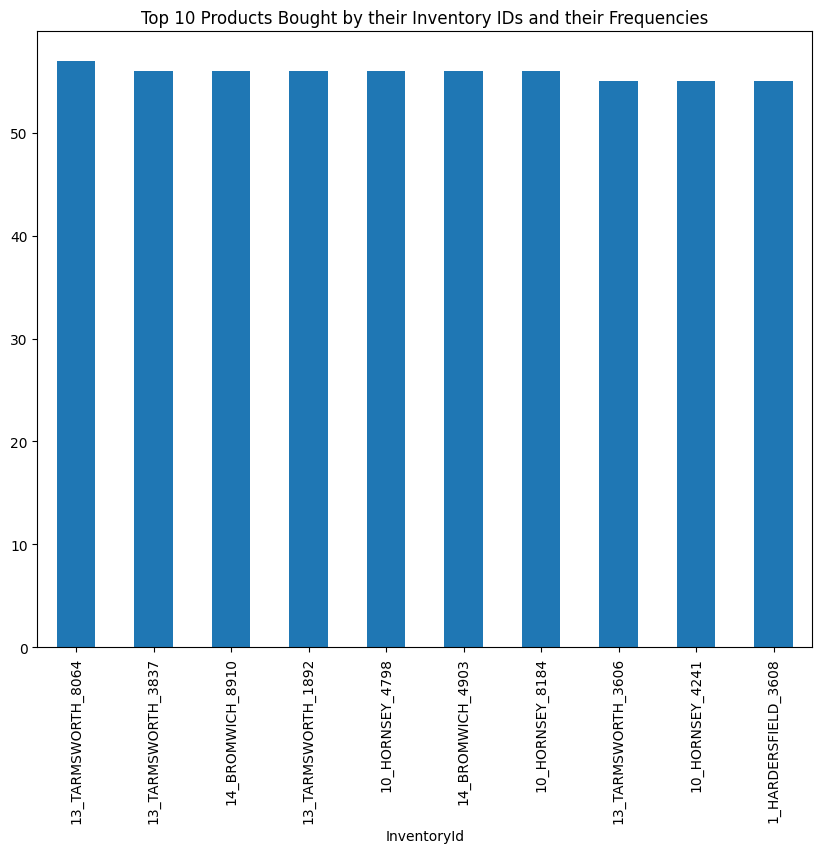

In [31]:
#Plot the histograms
InventoryID = sales['InventoryId'].value_counts()[:10]
InventoryID.plot(kind='bar', figsize = (10,8))
plt.title('Top 10 Products Bought by their Inventory IDs and their Frequencies')

Text(0.5, 1.0, 'Top 10 Stores Bought from by their Store IDs and their Frequencies')

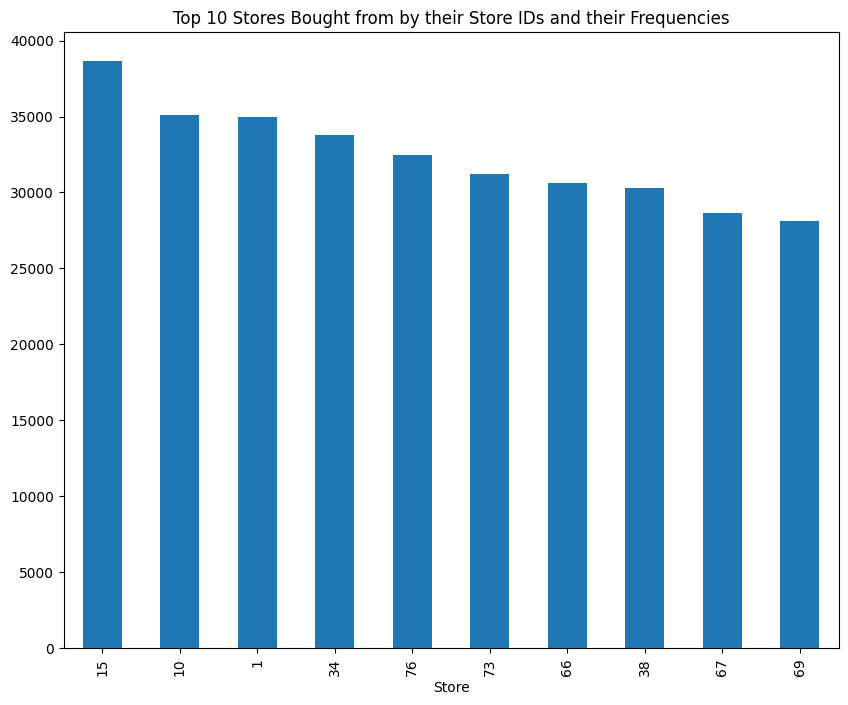

In [32]:
#Plot the histograms
Store = sales['Store'].value_counts()[:10]
Store.plot(kind='bar', figsize = (10,8))
plt.title('Top 10 Stores Bought from by their Store IDs and their Frequencies')

Text(0.5, 1.0, 'Top 10 Brands Bought and their Frequencies')

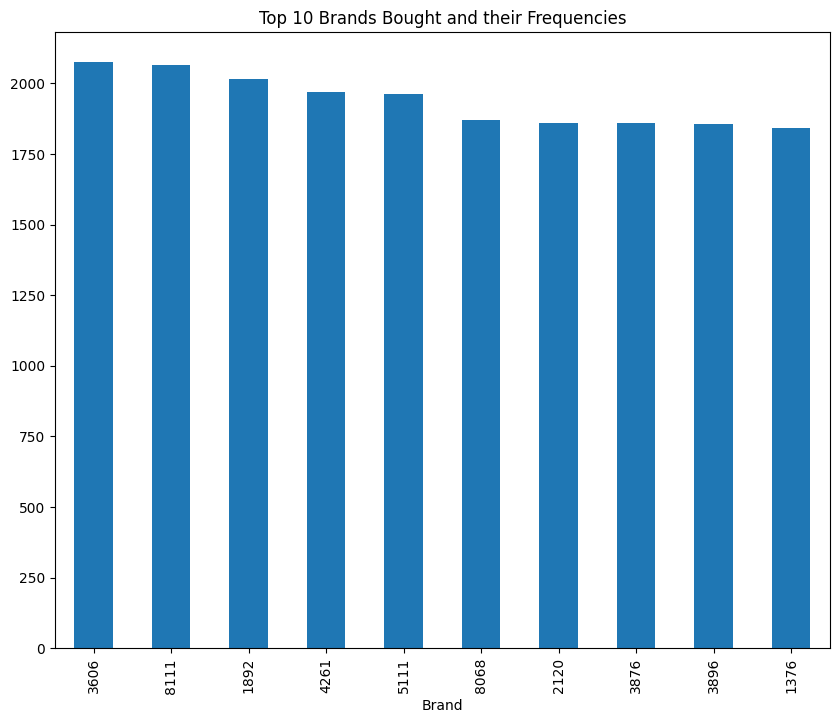

In [33]:
#Plot the histograms
Brand = sales['Brand'].value_counts()[:10]
Brand.plot(kind='bar', figsize = (10,8))
plt.title('Top 10 Brands Bought and their Frequencies')

Text(0.5, 1.0, 'Top 10 Brands Bought by their Description and their Frequencies')

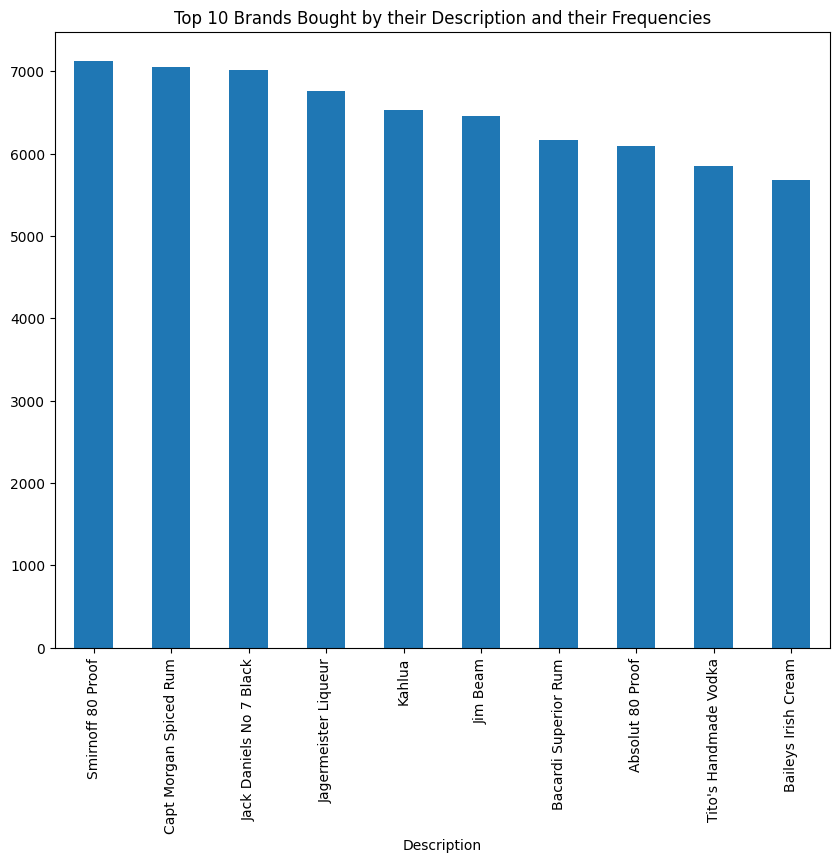

In [34]:
#Plot the histograms
Description = sales['Description'].value_counts()[:10]
Description.plot(kind='bar', figsize = (10,8))
plt.title('Top 10 Brands Bought by their Description and their Frequencies')

Text(0.5, 1.0, 'Top 10 Sizes Bought and their Frequencies')

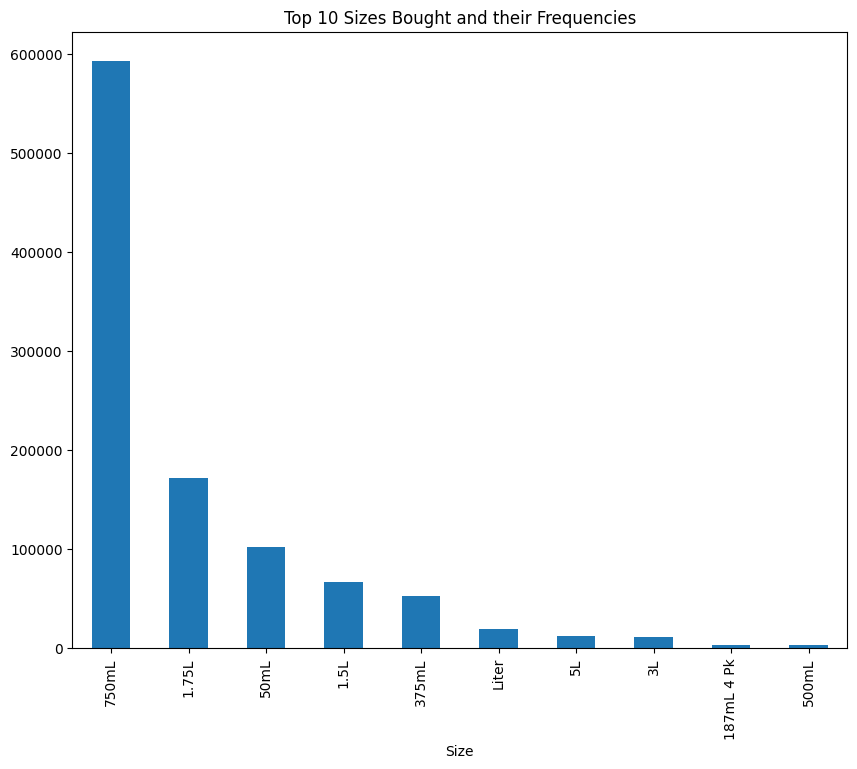

In [35]:
#Plot the histograms
Size = sales['Size'].value_counts()[:10]
Size.plot(kind='bar', figsize = (10,8))
plt.title('Top 10 Sizes Bought and their Frequencies')

Text(0.5, 1.0, 'Top 10 Sales Dates in terms of their Frequencies')

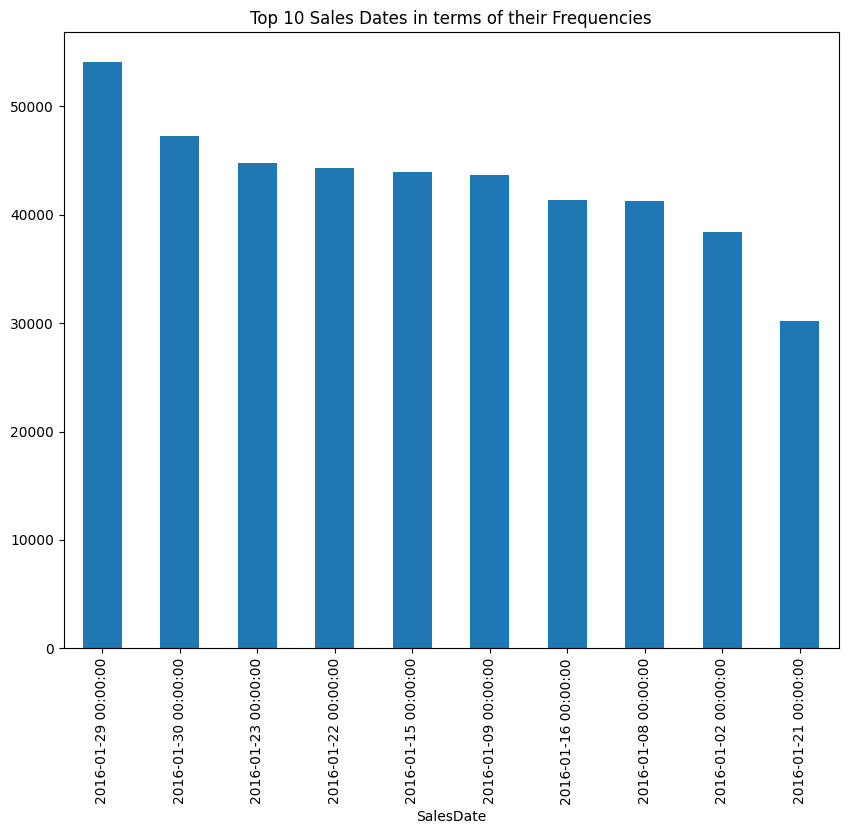

In [36]:
#Plot the histograms
SalesDate = sales['SalesDate'].value_counts()[:10]
SalesDate.plot(kind='bar', figsize = (10,8))
plt.title('Top 10 Sales Dates in terms of their Frequencies')

Text(0.5, 1.0, 'Classification by their Frequencies')

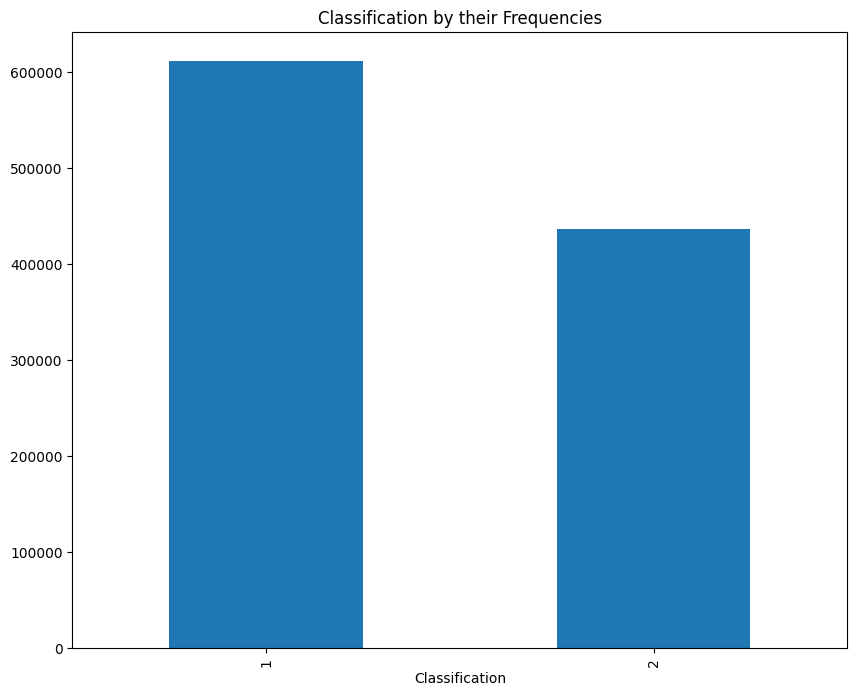

In [37]:
#Plot the histograms
Classification = sales['Classification'].value_counts()
Classification.plot(kind='bar', figsize = (10,8))
plt.title('Classification by their Frequencies')

Text(0.5, 1.0, 'Vendors by their Frequencies')

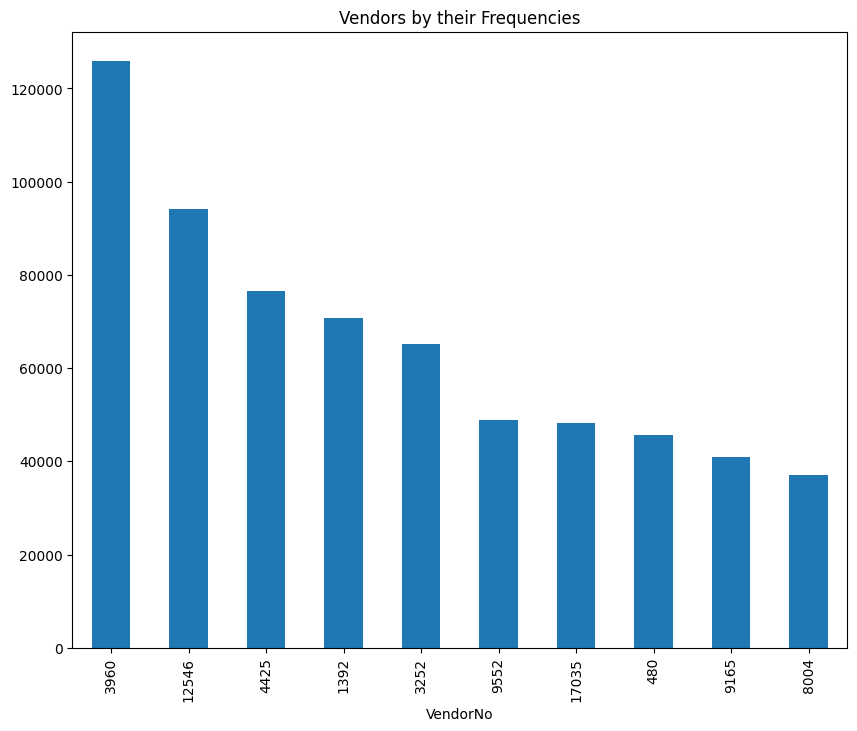

In [38]:
#Plot the histograms
VendorNo = sales['VendorNo'].value_counts()[:10]
VendorNo.plot(kind='bar', figsize = (10,8))
plt.title('Vendors by their Frequencies')

Text(0.5, 1.0, 'Vendors by their Frequencies')

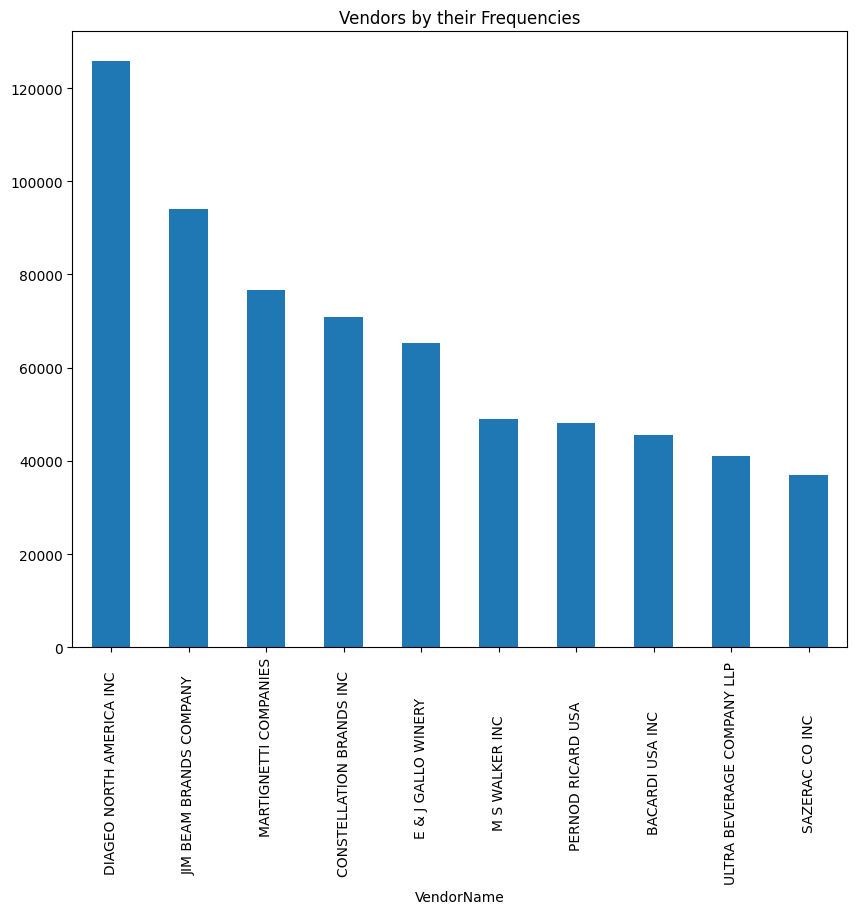

In [39]:
#Plot the histograms
VendorName = sales['VendorName'].value_counts()[:10]
VendorName.plot(kind='bar', figsize = (10,8))
plt.title('Vendors by their Frequencies')

In [40]:
#Analyze the Total Sales Per Store
sales_per_store = sales.groupby('Store')['SalesDollars'].sum().reset_index()
sales_per_store.columns = ['Store', 'TotalSales']
sales_per_store['Percentage'] = (sales_per_store['TotalSales']/sales_per_store['TotalSales'].sum())*100
print(sales_per_store.sort_values(by=['TotalSales'], ascending=False))

   Store  TotalSales  Percentage
27    34  1537806.51    4.640421
6     15  1422998.94    4.293982
73    76  1402698.59    4.232725
70    73  1266850.62    3.822796
62    66  1257824.93    3.795560
..   ...         ...         ...
20    28    89100.76    0.268867
30    37    66599.43    0.200968
21    29    46191.93    0.139387
18    26    33599.00    0.101387
22     3    30556.67    0.092207

[79 rows x 3 columns]


In [41]:
#Analyze the store with the highest sales
store_34 = sales[sales['Store'] == '34']
print(store_34)

               InventoryId Store  Brand                  Description   
268845  34_PITMERDEN_10021    34  10021  Clayhouse Syrah Paso Robles  \
268846  34_PITMERDEN_10030    34  10030      Pacifico Sur Pnt Nr Rsv   
268847  34_PITMERDEN_10030    34  10030      Pacifico Sur Pnt Nr Rsv   
268848   34_PITMERDEN_1005    34   1005      Maker's Mark Combo Pack   
268849   34_PITMERDEN_1005    34   1005      Maker's Mark Combo Pack   
...                    ...   ...    ...                          ...   
302620    34_PITMERDEN_984    34    984       Patron XO Cafe Liqueur   
302621    34_PITMERDEN_984    34    984       Patron XO Cafe Liqueur   
302622    34_PITMERDEN_984    34    984       Patron XO Cafe Liqueur   
302623    34_PITMERDEN_984    34    984       Patron XO Cafe Liqueur   
302624    34_PITMERDEN_998    34    998     Corralejo Blanco Tequila   

              Size  SalesQuantity  SalesDollars  SalesPrice  SalesDate   
268845       750mL              1         11.99       11.99 2

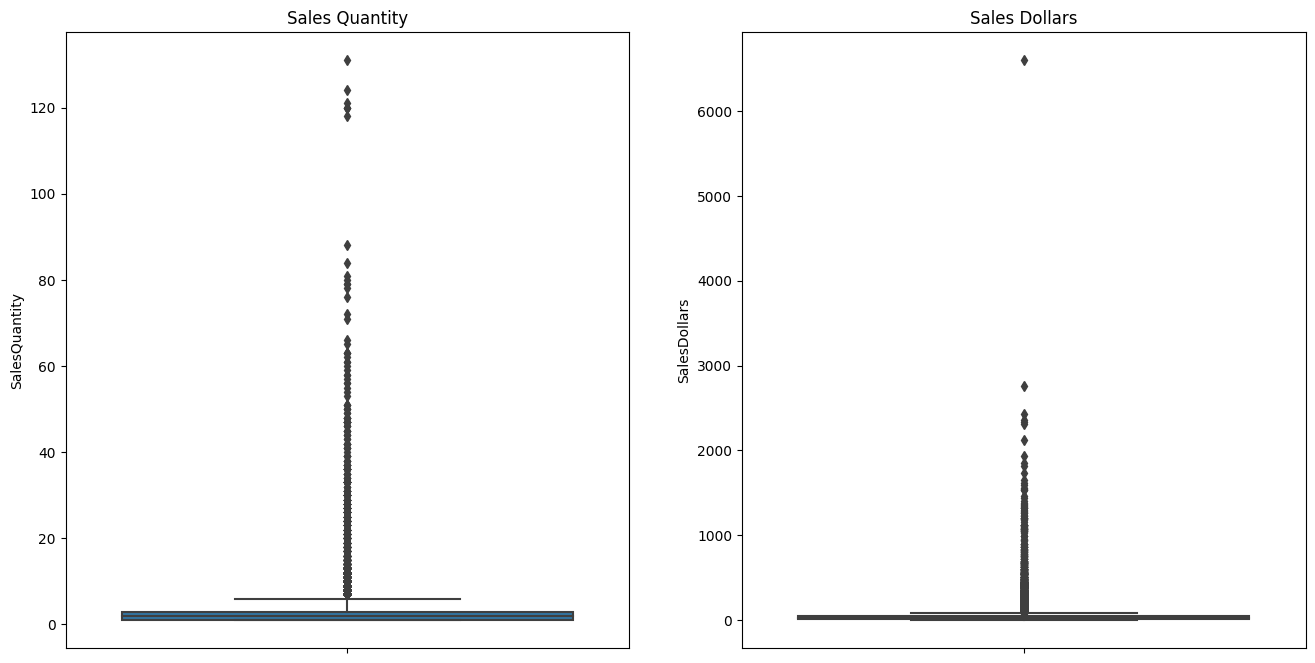

In [42]:
plt.figure(figsize = (16,8))
plt.subplot(1, 2, 1)
sns.boxplot(y = store_34['SalesQuantity']).title.set_text('Sales Quantity')
plt.subplot(1, 2, 2)
sns.boxplot(y = store_34['SalesDollars']).title.set_text('Sales Dollars')
plt.show()

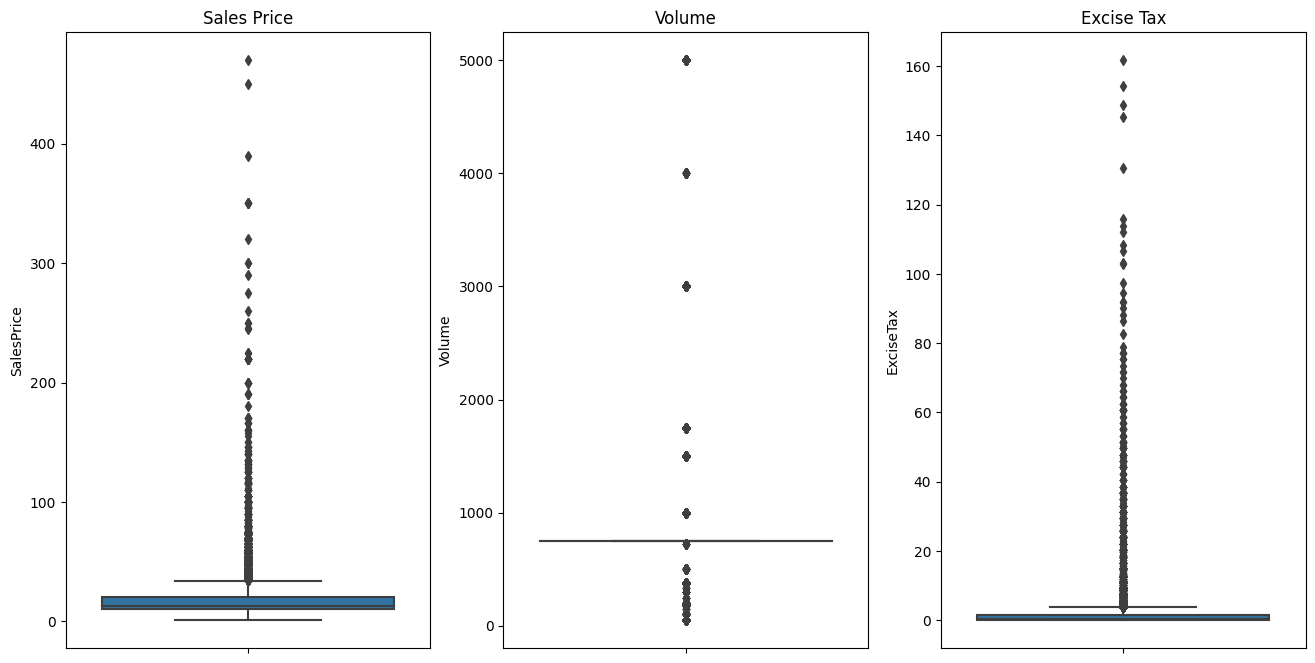

In [43]:
plt.figure(figsize = (16,8))
plt.subplot(1, 3, 1)
sns.boxplot(y = store_34['SalesPrice']).title.set_text('Sales Price')
plt.subplot(1, 3, 2)
sns.boxplot(y = store_34['Volume']).title.set_text('Volume')
plt.subplot(1, 3, 3)
sns.boxplot(y = store_34['ExciseTax']).title.set_text('Excise Tax')
plt.show()

In [44]:
#Analyze the Total Sales Per Product
sales_by_product = store_34.groupby(['Brand', 'Description', 'Size'])['SalesQuantity'].sum().reset_index()
sales_by_product.columns = ['Brand', 'Description', 'Size', 'TotalQuantity']
sales_by_product['Percentage'] = (sales_by_product['TotalQuantity']/sales_by_product['TotalQuantity'].sum())*100
print(sales_by_product.sort_values(by=['TotalQuantity'], ascending=False))

      Brand                 Description   Size  TotalQuantity  Percentage
3676   4261      Capt Morgan Spiced Rum  1.75L           1055    1.063819
2997   3545             Ketel One Vodka  1.75L            843    0.850047
4683   8111           Smirnoff 80 Proof   50mL            812    0.818788
3321   3858            Grey Goose Vodka  750mL            685    0.690726
4663   8068            Absolut 80 Proof  1.75L            606    0.611066
...     ...                         ...    ...            ...         ...
2258   2625   Nikka Coffey Grain Whisky  750mL              1    0.001008
2257  26248            Roederer Cristal  750mL              1    0.001008
2256  26247       Roederer Brut Premier  750mL              1    0.001008
2247   2614  Dewars Special RSV 12-Year  1.75L              1    0.001008
4958    998    Corralejo Blanco Tequila  750mL              1    0.001008

[4959 rows x 5 columns]


In [45]:
#Analyze the product with the highest sales
bestseller_34 = store_34[(store_34['Brand'] == '4261') & (store_34['Description'] == 'Capt Morgan Spiced Rum') & (store_34['Size'] == '1.75L')]
print(bestseller_34)

              InventoryId Store Brand             Description   Size   
291501  34_PITMERDEN_4261    34  4261  Capt Morgan Spiced Rum  1.75L  \
291502  34_PITMERDEN_4261    34  4261  Capt Morgan Spiced Rum  1.75L   
291503  34_PITMERDEN_4261    34  4261  Capt Morgan Spiced Rum  1.75L   
291504  34_PITMERDEN_4261    34  4261  Capt Morgan Spiced Rum  1.75L   
291505  34_PITMERDEN_4261    34  4261  Capt Morgan Spiced Rum  1.75L   
291506  34_PITMERDEN_4261    34  4261  Capt Morgan Spiced Rum  1.75L   
291507  34_PITMERDEN_4261    34  4261  Capt Morgan Spiced Rum  1.75L   
291508  34_PITMERDEN_4261    34  4261  Capt Morgan Spiced Rum  1.75L   
291509  34_PITMERDEN_4261    34  4261  Capt Morgan Spiced Rum  1.75L   
291510  34_PITMERDEN_4261    34  4261  Capt Morgan Spiced Rum  1.75L   
291511  34_PITMERDEN_4261    34  4261  Capt Morgan Spiced Rum  1.75L   
291512  34_PITMERDEN_4261    34  4261  Capt Morgan Spiced Rum  1.75L   
291513  34_PITMERDEN_4261    34  4261  Capt Morgan Spiced Rum  1

In [46]:
print(bestseller_34['SalesQuantity'].sum())

1055


In [47]:
#Group the sales by date
bestseller_34_sales = bestseller_34.groupby('SalesDate')['SalesQuantity'].sum().reset_index()
bestseller_34_sales = bestseller_34_sales.sort_values('SalesDate')
bestseller_34_sales

,SalesDate,SalesQuantity
0,2016-01-01,20
1,2016-01-03,29
2,2016-01-06,20
3,2016-01-07,39
4,2016-01-08,45
5,2016-01-09,56
6,2016-01-10,19
7,2016-01-11,13
8,2016-01-12,34
9,2016-01-13,33


It appears the original sales table has the sales group per date per store per brand

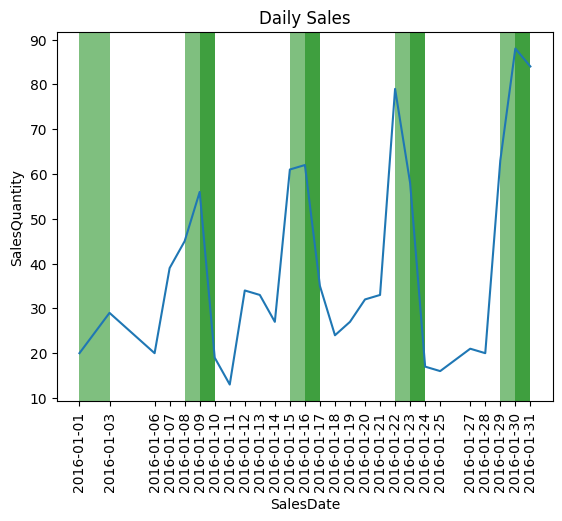

In [48]:
# Create line plot
x = bestseller_34['SalesDate']
y = bestseller_34['SalesQuantity']
for index, row in bestseller_34.iterrows():
    if row['DayOfWeek'] == 'Friday':
        plt.axvspan(row['SalesDate'], row['SalesDate'] + pd.Timedelta(days=2), facecolor='green', edgecolor='none', alpha=.5)
    if row['DayOfWeek'] == 'Saturday':
        plt.axvspan(row['SalesDate'], row['SalesDate'] + pd.Timedelta(days=1), facecolor='green', edgecolor='none', alpha=.5)
    if row['DayOfWeek'] == 'Sunday':
        plt.axvspan(row['SalesDate'], row['SalesDate'] + pd.Timedelta(days=0), facecolor='green', edgecolor='none', alpha=.5)

plt.plot(x, y)
plt.xticks(x, rotation = 90)
plt.xlabel('SalesDate')
plt.ylabel('SalesQuantity')
plt.title('Daily Sales')

plt.show()

Clear and interesting pattern showing sales spikes during the weekends. The first weekend marker was relatively lower than the rest probably due to stores limited opening times during the holiday.

<Axes: xlabel='DayOfWeek'>

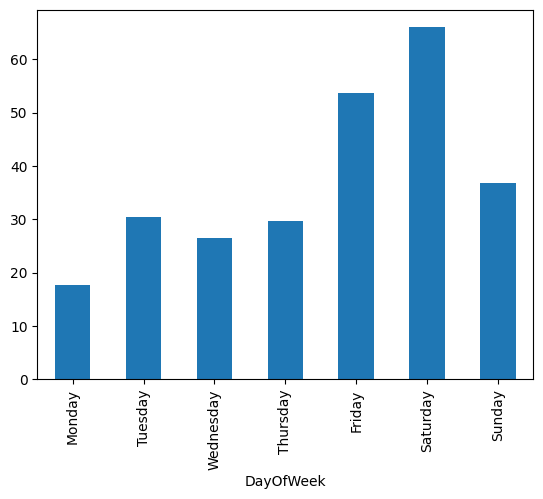

In [49]:
# Day of week variability
bestseller_34_grouped = bestseller_34.groupby(['WeekdayNum', 'DayOfWeek'])['SalesQuantity'].mean().reset_index(level=0, drop=True)
bestseller_34_grouped.plot.bar(x="DayOfWeek")

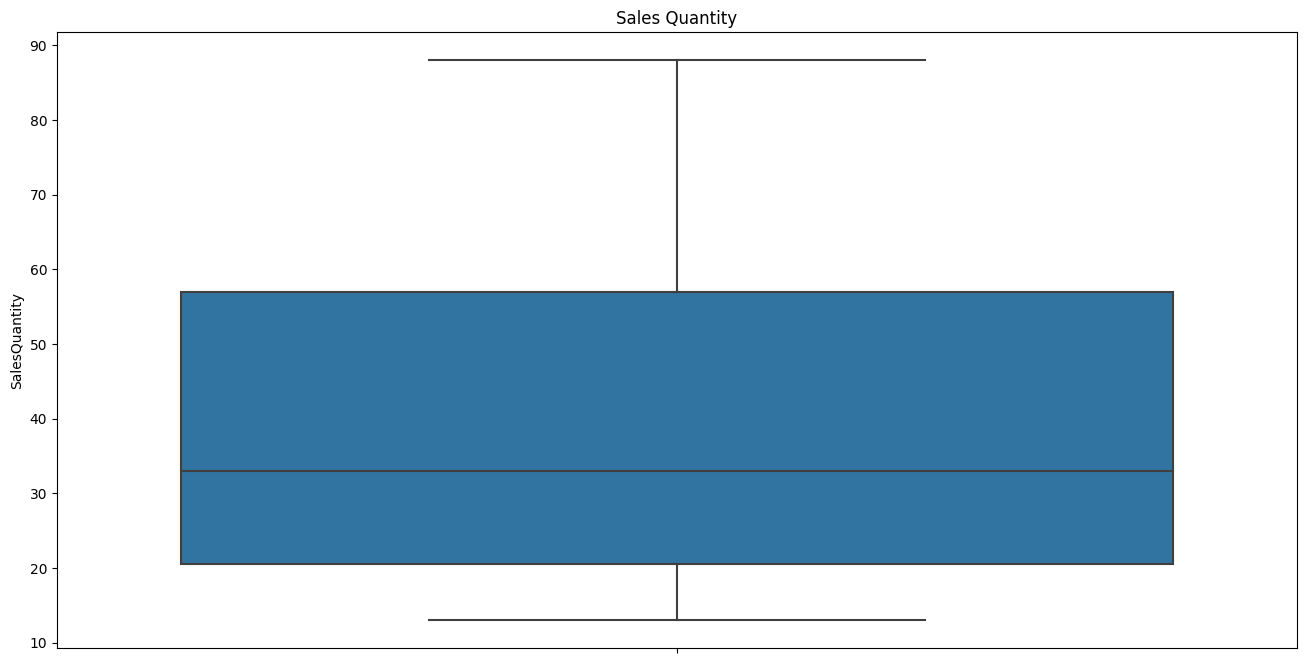

In [50]:
plt.figure(figsize = (16,8))

sns.boxplot(y = bestseller_34['SalesQuantity']).title.set_text('Sales Quantity')

plt.show()

No outliers

In [51]:
#Analyze stores 66, 28 and 26 to confirm similar patterns with store 34
store_66 = sales[sales['Store'] == '66']
store_28 = sales[sales['Store'] == '28']
store_26 = sales[sales['Store'] == '26']
print(store_66)
print(store_28)
print(store_26)

               InventoryId Store Brand               Description       Size   
650284  66_EANVERNESS_1001    66  1001      Bailey's 50mL 4 Pack  50mL 4 Pk  \
650285  66_EANVERNESS_1001    66  1001      Bailey's 50mL 4 Pack  50mL 4 Pk   
650286  66_EANVERNESS_1001    66  1001      Bailey's 50mL 4 Pack  50mL 4 Pk   
650287  66_EANVERNESS_1001    66  1001      Bailey's 50mL 4 Pack  50mL 4 Pk   
650288  66_EANVERNESS_1001    66  1001      Bailey's 50mL 4 Pack  50mL 4 Pk   
...                    ...   ...   ...                       ...        ...   
680879   66_EANVERNESS_984    66   984    Patron XO Cafe Liqueur      750mL   
680880   66_EANVERNESS_984    66   984    Patron XO Cafe Liqueur      750mL   
680881   66_EANVERNESS_998    66   998  Corralejo Blanco Tequila      750mL   
680882   66_EANVERNESS_998    66   998  Corralejo Blanco Tequila      750mL   
680883   66_EANVERNESS_999    66   999       Jameson 18 Year Old      750mL   

        SalesQuantity  SalesDollars  SalesPrice  Sa

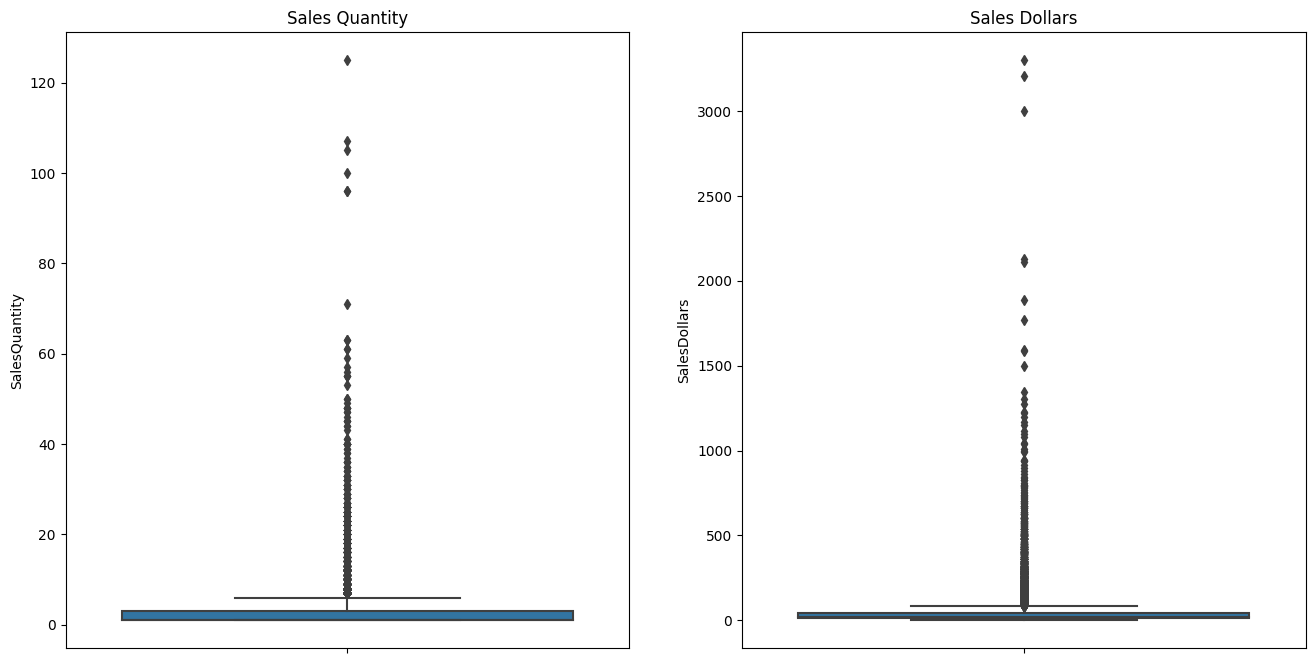

In [52]:
plt.figure(figsize = (16,8))
plt.subplot(1, 2, 1)
sns.boxplot(y = store_66['SalesQuantity']).title.set_text('Sales Quantity')
plt.subplot(1, 2, 2)
sns.boxplot(y = store_66['SalesDollars']).title.set_text('Sales Dollars')
plt.show()

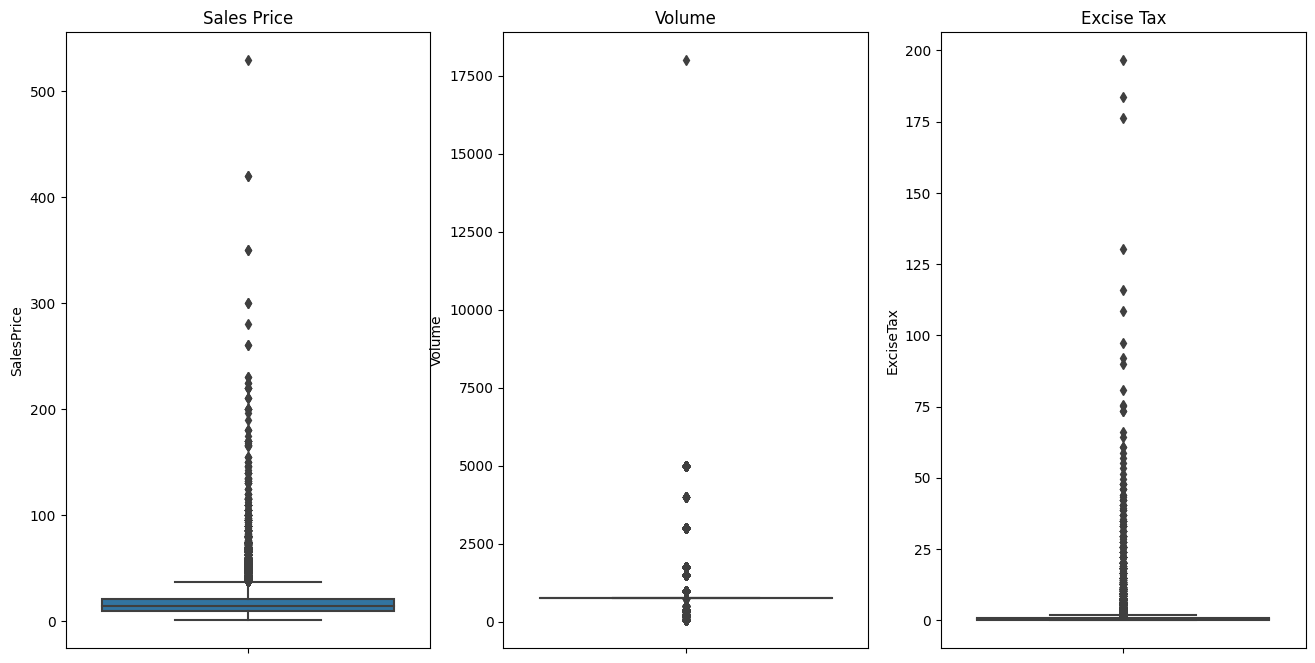

In [53]:
plt.figure(figsize = (16,8))
plt.subplot(1, 3, 1)
sns.boxplot(y = store_66['SalesPrice']).title.set_text('Sales Price')
plt.subplot(1, 3, 2)
sns.boxplot(y = store_66['Volume']).title.set_text('Volume')
plt.subplot(1, 3, 3)
sns.boxplot(y = store_66['ExciseTax']).title.set_text('Excise Tax')
plt.show()

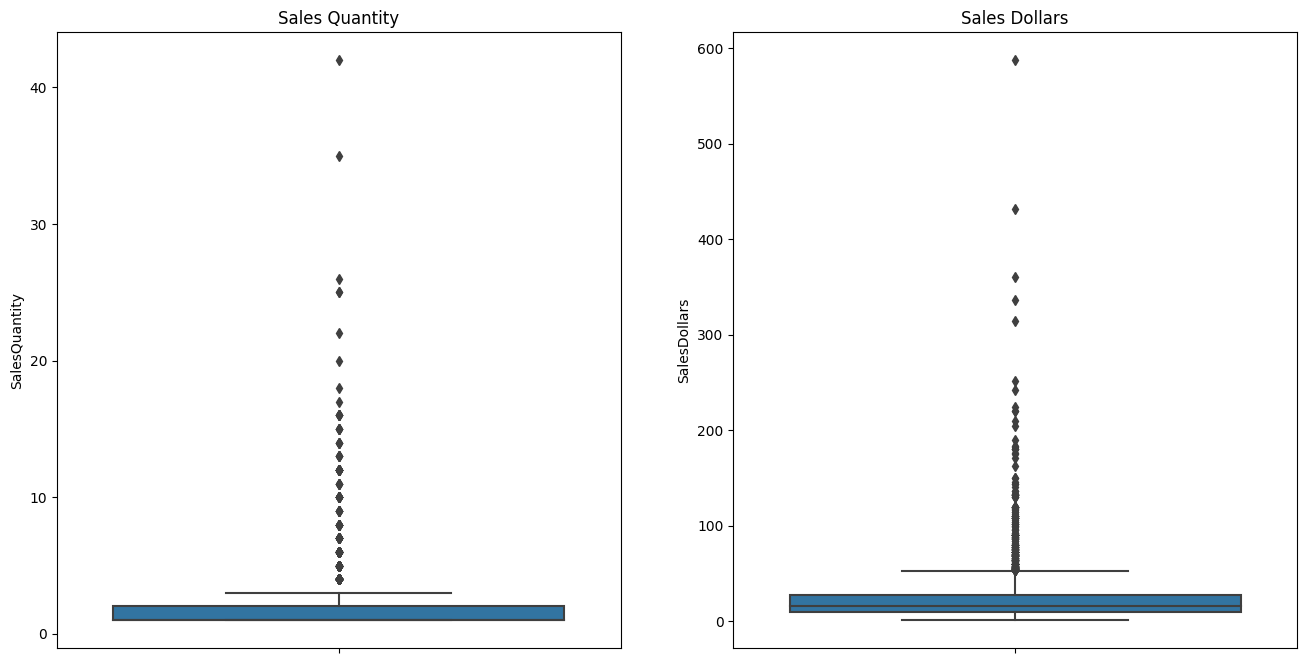

In [54]:
plt.figure(figsize = (16,8))
plt.subplot(1, 2, 1)
sns.boxplot(y = store_28['SalesQuantity']).title.set_text('Sales Quantity')
plt.subplot(1, 2, 2)
sns.boxplot(y = store_28['SalesDollars']).title.set_text('Sales Dollars')
plt.show()

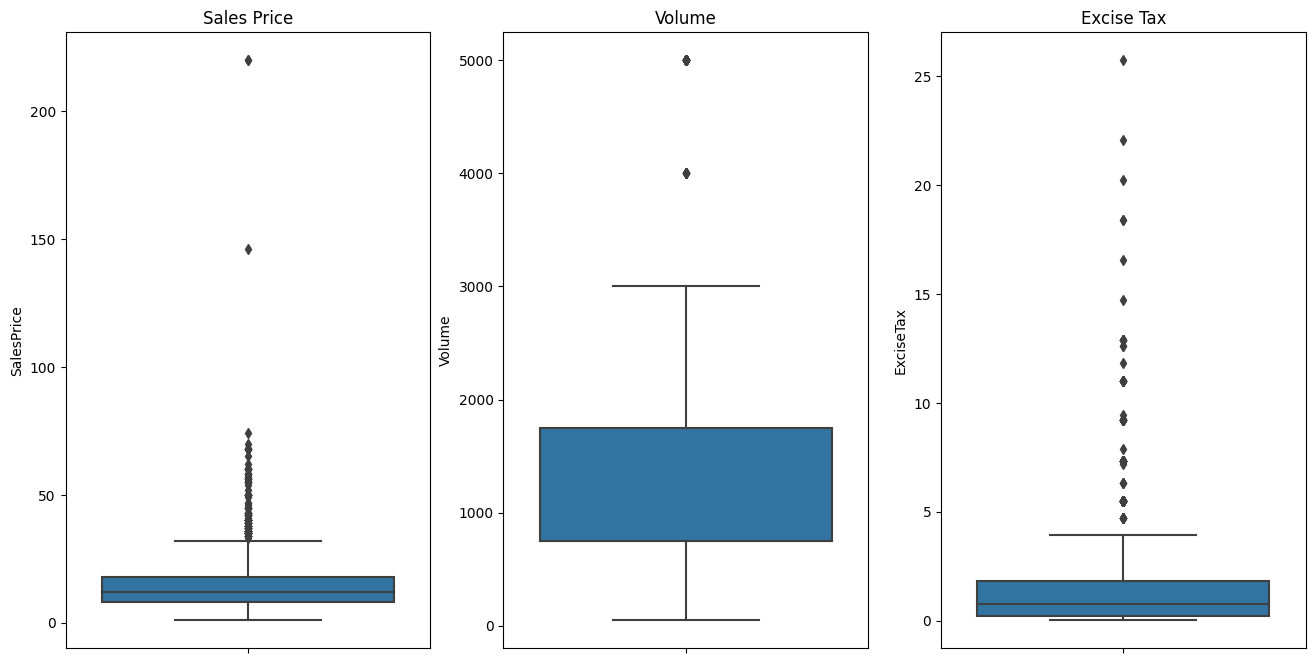

In [55]:
plt.figure(figsize = (16,8))
plt.subplot(1, 3, 1)
sns.boxplot(y = store_28['SalesPrice']).title.set_text('Sales Price')
plt.subplot(1, 3, 2)
sns.boxplot(y = store_28['Volume']).title.set_text('Volume')
plt.subplot(1, 3, 3)
sns.boxplot(y = store_28['ExciseTax']).title.set_text('Excise Tax')
plt.show()

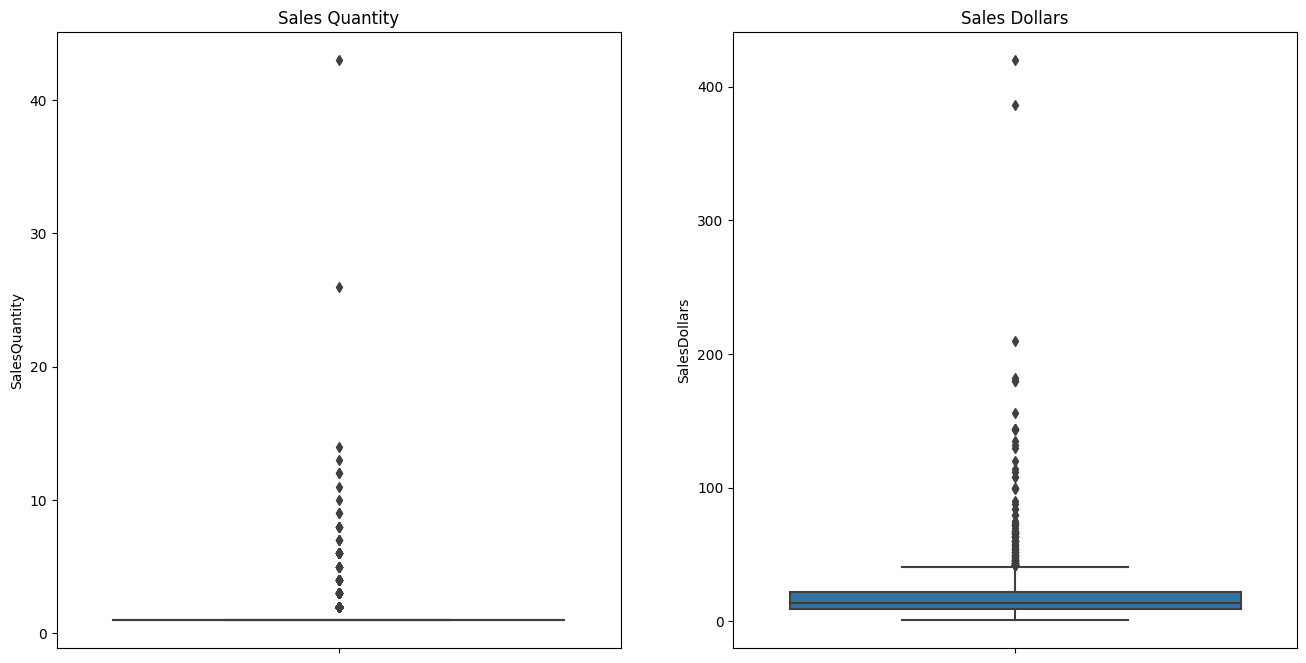

In [56]:
plt.figure(figsize = (16,8))
plt.subplot(1, 2, 1)
sns.boxplot(y = store_26['SalesQuantity']).title.set_text('Sales Quantity')
plt.subplot(1, 2, 2)
sns.boxplot(y = store_26['SalesDollars']).title.set_text('Sales Dollars')
plt.show()

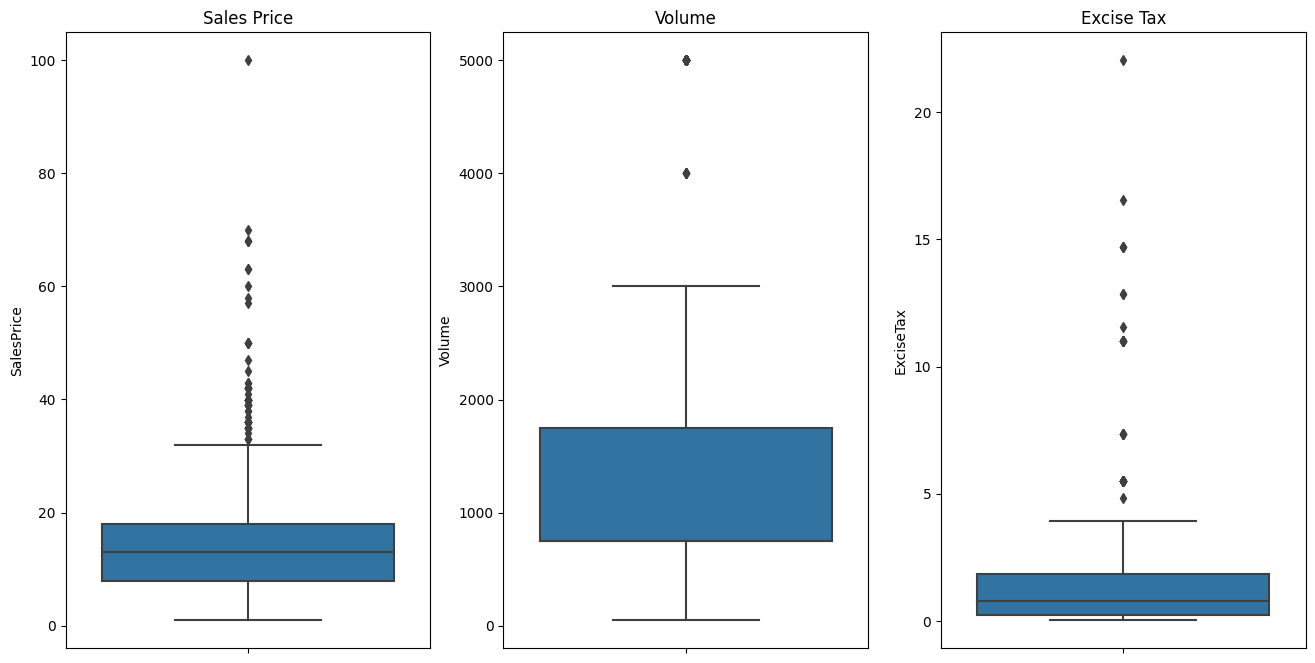

In [57]:
plt.figure(figsize = (16,8))
plt.subplot(1, 3, 1)
sns.boxplot(y = store_26['SalesPrice']).title.set_text('Sales Price')
plt.subplot(1, 3, 2)
sns.boxplot(y = store_26['Volume']).title.set_text('Volume')
plt.subplot(1, 3, 3)
sns.boxplot(y = store_26['ExciseTax']).title.set_text('Excise Tax')
plt.show()

In [58]:
#Analyze the Total Sales Per Product Per Store
sales_by_product = store_66.groupby(['Brand', 'Description', 'Size'])['SalesQuantity'].sum().reset_index()
sales_by_product.columns = ['Brand', 'Description', 'Size', 'TotalQuantity']
sales_by_product['Percentage'] = (sales_by_product['TotalQuantity']/sales_by_product['TotalQuantity'].sum())*100
print(sales_by_product.sort_values(by=['TotalQuantity'], ascending=False))

      Brand                   Description   Size  TotalQuantity  Percentage
3642   5111  Dr McGillicuddy's Mentholmnt   50mL            653    0.850105
3229   4261        Capt Morgan Spiced Rum  1.75L            560    0.729034
2608   3545               Ketel One Vodka  1.75L            501    0.652225
2495   3405         Tito's Handmade Vodka  1.75L            472    0.614471
4169   8111             Smirnoff 80 Proof   50mL            420    0.546775
...     ...                           ...    ...            ...         ...
1479  23632   Firesteed Wines Rose Pnt Nr  750mL              1    0.001302
1478  23596          Menage A Trois Znfdl  750mL              1    0.001302
1475  23535       Wente Pnt Nr Riva Ranch  750mL              1    0.001302
1468  23511       Plantaze Cab Montenegro  750mL              1    0.001302
4443    999           Jameson 18 Year Old  750mL              1    0.001302

[4444 rows x 5 columns]


In [59]:
#Analyze the Total Sales Per Product Per Store
sales_by_product = store_28.groupby(['Brand', 'Description', 'Size'])['SalesQuantity'].sum().reset_index()
sales_by_product.columns = ['Brand', 'Description', 'Size', 'TotalQuantity']
sales_by_product['Percentage'] = (sales_by_product['TotalQuantity']/sales_by_product['TotalQuantity'].sum())*100
print(sales_by_product.sort_values(by=['TotalQuantity'], ascending=False))

     Brand                   Description   Size  TotalQuantity  Percentage
554   5111  Dr McGillicuddy's Mentholmnt   50mL            216    2.863203
109   1892                    Yukon Jack   50mL            184    2.439024
729   8111             Smirnoff 80 Proof   50mL            137    1.816013
404   3837                    Skyy Vodka   50mL            128    1.696713
749   8236                      Jim Beam   50mL            105    1.391835
..     ...                           ...    ...            ...         ...
321   3534        Milagro Silver Tequila  750mL              1    0.013256
672   6727           Antinori Toscana Rd  750mL              1    0.013256
673    676        Pinnacle Whipped Vodka  750mL              1    0.013256
312  34905           Smoking Loon Merlot  750mL              1    0.013256
408  38457           Smoking Loon Pnt Nr  750mL              1    0.013256

[817 rows x 5 columns]


In [60]:
#Analyze the Total Sales Per Product Per Store
sales_by_product = store_26.groupby(['Brand', 'Description', 'Size'])['SalesQuantity'].sum().reset_index()
sales_by_product.columns = ['Brand', 'Description', 'Size', 'TotalQuantity']
sales_by_product['Percentage'] = (sales_by_product['TotalQuantity']/sales_by_product['TotalQuantity'].sum())*100
print(sales_by_product.sort_values(by=['TotalQuantity'], ascending=False))

     Brand               Description   Size  TotalQuantity  Percentage
696   8606    Baileys Espresso Creme   50mL             48    1.816805
21   12465    Cline Cashmere Red Cal  750mL             45    1.703255
524   5491               Rumpleminze   50mL             34    1.286904
99    1892                Yukon Jack   50mL             33    1.249054
398   4261    Capt Morgan Spiced Rum  1.75L             30    1.135503
..     ...                       ...    ...            ...         ...
336   3857          Grey Goose Vodka  1.75L              1    0.037850
334   3851          Grey Goose Vodka  375mL              1    0.037850
332   3840  Smirnoff Raspberry Vodka  1.75L              1    0.037850
330   3835  Smirnoff Raspberry Vodka  750mL              1    0.037850
727    984    Patron XO Cafe Liqueur  750mL              1    0.037850

[728 rows x 5 columns]


In [61]:
#Analyze the Capt Morgan Spiced Rum(1.75L) 4261 Brand per store
CMSR_66 = store_66[(store_66['Brand'] == '4261') & (store_66['Description'] == 'Capt Morgan Spiced Rum') & (store_66['Size'] == '1.75L')]
print(CMSR_66)

               InventoryId Store Brand             Description   Size   
671360  66_EANVERNESS_4261    66  4261  Capt Morgan Spiced Rum  1.75L  \
671361  66_EANVERNESS_4261    66  4261  Capt Morgan Spiced Rum  1.75L   
671362  66_EANVERNESS_4261    66  4261  Capt Morgan Spiced Rum  1.75L   
671363  66_EANVERNESS_4261    66  4261  Capt Morgan Spiced Rum  1.75L   
671364  66_EANVERNESS_4261    66  4261  Capt Morgan Spiced Rum  1.75L   
671365  66_EANVERNESS_4261    66  4261  Capt Morgan Spiced Rum  1.75L   
671366  66_EANVERNESS_4261    66  4261  Capt Morgan Spiced Rum  1.75L   
671367  66_EANVERNESS_4261    66  4261  Capt Morgan Spiced Rum  1.75L   
671368  66_EANVERNESS_4261    66  4261  Capt Morgan Spiced Rum  1.75L   
671369  66_EANVERNESS_4261    66  4261  Capt Morgan Spiced Rum  1.75L   
671370  66_EANVERNESS_4261    66  4261  Capt Morgan Spiced Rum  1.75L   
671371  66_EANVERNESS_4261    66  4261  Capt Morgan Spiced Rum  1.75L   
671372  66_EANVERNESS_4261    66  4261  Capt Morgan

In [62]:
CMSR_28 = store_28[(store_28['Brand'] == '4261') & (store_28['Description'] == 'Capt Morgan Spiced Rum') & (store_28['Size'] == '1.75L')]
print(CMSR_28)

             InventoryId Store Brand             Description   Size   
212725  28_LARNWICK_4261    28  4261  Capt Morgan Spiced Rum  1.75L  \
212726  28_LARNWICK_4261    28  4261  Capt Morgan Spiced Rum  1.75L   
212727  28_LARNWICK_4261    28  4261  Capt Morgan Spiced Rum  1.75L   
212728  28_LARNWICK_4261    28  4261  Capt Morgan Spiced Rum  1.75L   
212729  28_LARNWICK_4261    28  4261  Capt Morgan Spiced Rum  1.75L   
212730  28_LARNWICK_4261    28  4261  Capt Morgan Spiced Rum  1.75L   
212731  28_LARNWICK_4261    28  4261  Capt Morgan Spiced Rum  1.75L   
212732  28_LARNWICK_4261    28  4261  Capt Morgan Spiced Rum  1.75L   
212733  28_LARNWICK_4261    28  4261  Capt Morgan Spiced Rum  1.75L   
212734  28_LARNWICK_4261    28  4261  Capt Morgan Spiced Rum  1.75L   
212735  28_LARNWICK_4261    28  4261  Capt Morgan Spiced Rum  1.75L   
212736  28_LARNWICK_4261    28  4261  Capt Morgan Spiced Rum  1.75L   
212737  28_LARNWICK_4261    28  4261  Capt Morgan Spiced Rum  1.75L   
212738

In [63]:
CMSR_26 = store_26[(store_26['Brand'] == '4261') & (store_26['Description'] == 'Capt Morgan Spiced Rum') & (store_26['Size'] == '1.75L')]
print(CMSR_26)

                 InventoryId Store Brand             Description   Size   
199653  26_KNIFE'S EDGE_4261    26  4261  Capt Morgan Spiced Rum  1.75L  \
199654  26_KNIFE'S EDGE_4261    26  4261  Capt Morgan Spiced Rum  1.75L   
199655  26_KNIFE'S EDGE_4261    26  4261  Capt Morgan Spiced Rum  1.75L   
199656  26_KNIFE'S EDGE_4261    26  4261  Capt Morgan Spiced Rum  1.75L   
199657  26_KNIFE'S EDGE_4261    26  4261  Capt Morgan Spiced Rum  1.75L   
199658  26_KNIFE'S EDGE_4261    26  4261  Capt Morgan Spiced Rum  1.75L   
199659  26_KNIFE'S EDGE_4261    26  4261  Capt Morgan Spiced Rum  1.75L   
199660  26_KNIFE'S EDGE_4261    26  4261  Capt Morgan Spiced Rum  1.75L   
199661  26_KNIFE'S EDGE_4261    26  4261  Capt Morgan Spiced Rum  1.75L   
199662  26_KNIFE'S EDGE_4261    26  4261  Capt Morgan Spiced Rum  1.75L   
199663  26_KNIFE'S EDGE_4261    26  4261  Capt Morgan Spiced Rum  1.75L   
199664  26_KNIFE'S EDGE_4261    26  4261  Capt Morgan Spiced Rum  1.75L   
199665  26_KNIFE'S EDGE_4

In [64]:
print(CMSR_66['SalesQuantity'].sum())
print(CMSR_28['SalesQuantity'].sum())
print(CMSR_26['SalesQuantity'].sum())

560
98
30


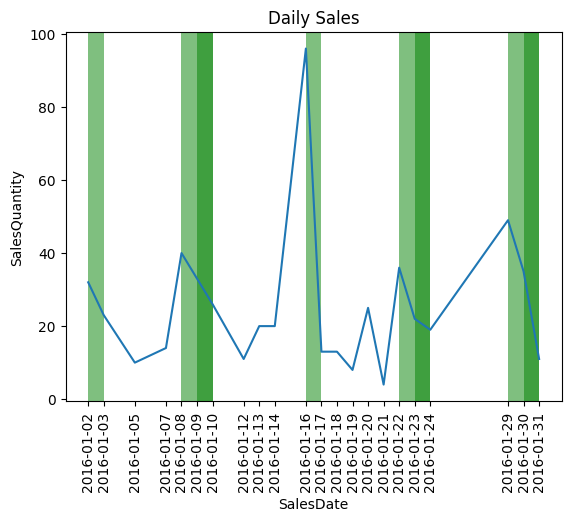

In [65]:
# Create line plot
x = CMSR_66['SalesDate']
y = CMSR_66['SalesQuantity']
for index, row in CMSR_66.iterrows():
    if row['DayOfWeek'] == 'Friday':
        plt.axvspan(row['SalesDate'], row['SalesDate'] + pd.Timedelta(days=2), facecolor='green', edgecolor='none', alpha=.5)
    if row['DayOfWeek'] == 'Saturday':
        plt.axvspan(row['SalesDate'], row['SalesDate'] + pd.Timedelta(days=1), facecolor='green', edgecolor='none', alpha=.5)
    if row['DayOfWeek'] == 'Sunday':
        plt.axvspan(row['SalesDate'], row['SalesDate'] + pd.Timedelta(days=0), facecolor='green', edgecolor='none', alpha=.5)

plt.plot(x, y)
plt.xticks(x, rotation = 90)
plt.xlabel('SalesDate')
plt.ylabel('SalesQuantity')
plt.title('Daily Sales')

plt.show()

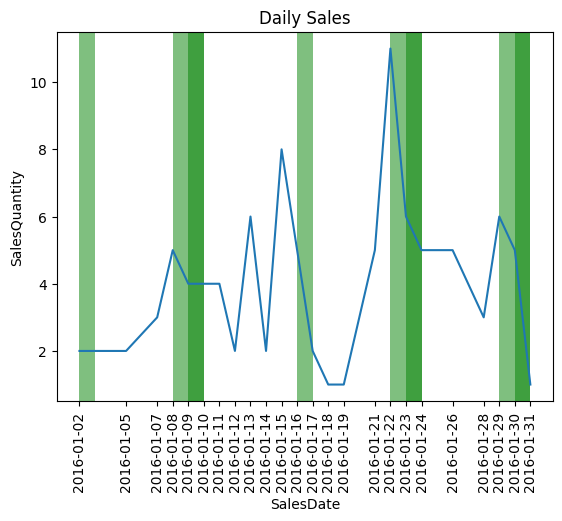

In [66]:
# Create line plot
x = CMSR_28['SalesDate']
y = CMSR_28['SalesQuantity']
for index, row in CMSR_66.iterrows():
    if row['DayOfWeek'] == 'Friday':
        plt.axvspan(row['SalesDate'], row['SalesDate'] + pd.Timedelta(days=2), facecolor='green', edgecolor='none', alpha=.5)
    if row['DayOfWeek'] == 'Saturday':
        plt.axvspan(row['SalesDate'], row['SalesDate'] + pd.Timedelta(days=1), facecolor='green', edgecolor='none', alpha=.5)
    if row['DayOfWeek'] == 'Sunday':
        plt.axvspan(row['SalesDate'], row['SalesDate'] + pd.Timedelta(days=0), facecolor='green', edgecolor='none', alpha=.5)

plt.plot(x, y)
plt.xticks(x, rotation = 90)
plt.xlabel('SalesDate')
plt.ylabel('SalesQuantity')
plt.title('Daily Sales')

plt.show()

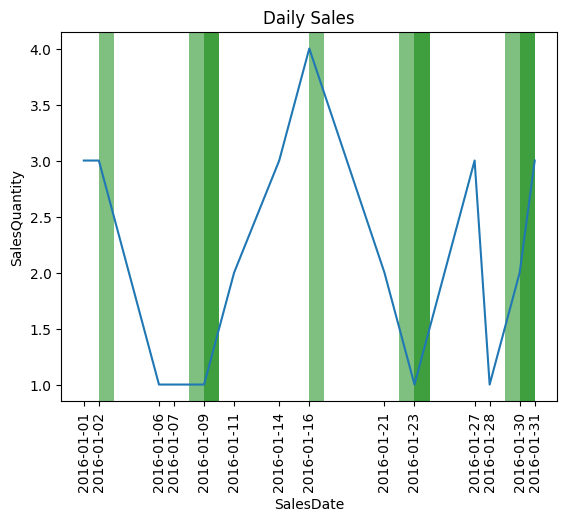

In [67]:
# Create line plot
x = CMSR_26['SalesDate']
y = CMSR_26['SalesQuantity']
for index, row in CMSR_66.iterrows():
    if row['DayOfWeek'] == 'Friday':
        plt.axvspan(row['SalesDate'], row['SalesDate'] + pd.Timedelta(days=2), facecolor='green', edgecolor='none', alpha=.5)
    if row['DayOfWeek'] == 'Saturday':
        plt.axvspan(row['SalesDate'], row['SalesDate'] + pd.Timedelta(days=1), facecolor='green', edgecolor='none', alpha=.5)
    if row['DayOfWeek'] == 'Sunday':
        plt.axvspan(row['SalesDate'], row['SalesDate'] + pd.Timedelta(days=0), facecolor='green', edgecolor='none', alpha=.5)

plt.plot(x, y)
plt.xticks(x, rotation = 90)
plt.xlabel('SalesDate')
plt.ylabel('SalesQuantity')
plt.title('Daily Sales')

plt.show()

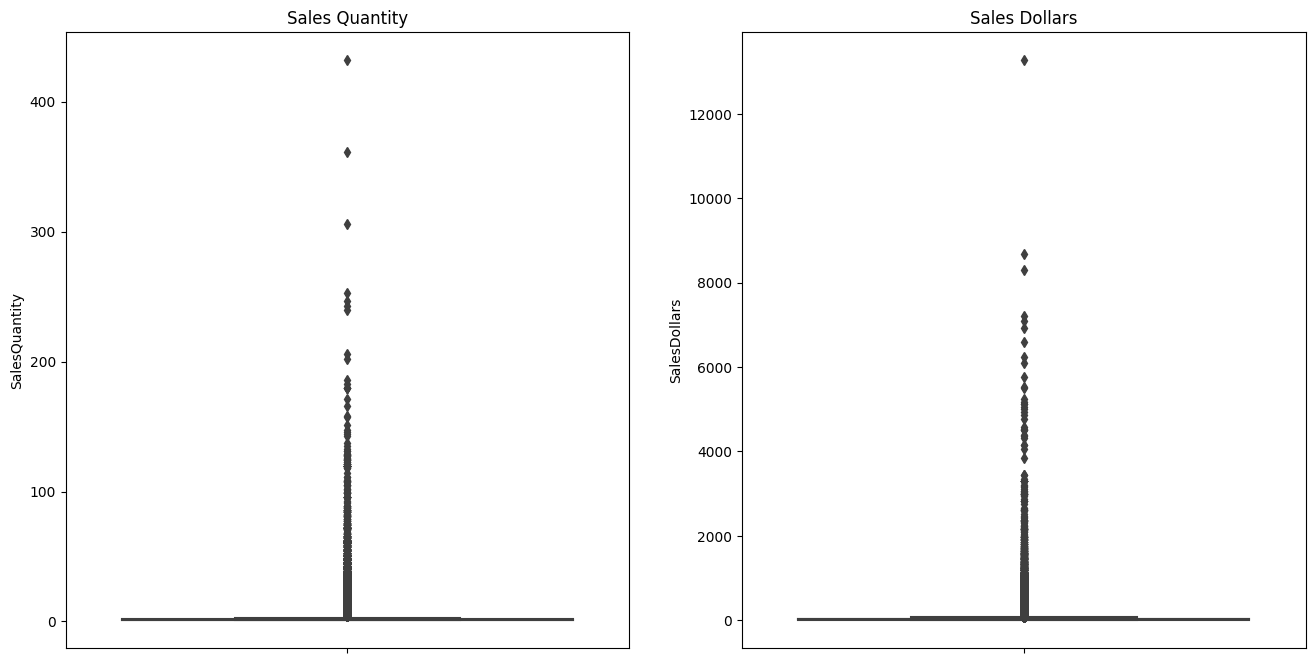

In [68]:
#Analyse all the sales
plt.figure(figsize = (16,8))
plt.subplot(1, 2, 1)
sns.boxplot(y = sales['SalesQuantity']).title.set_text('Sales Quantity')
plt.subplot(1, 2, 2)
sns.boxplot(y = sales['SalesDollars']).title.set_text('Sales Dollars')
plt.show()

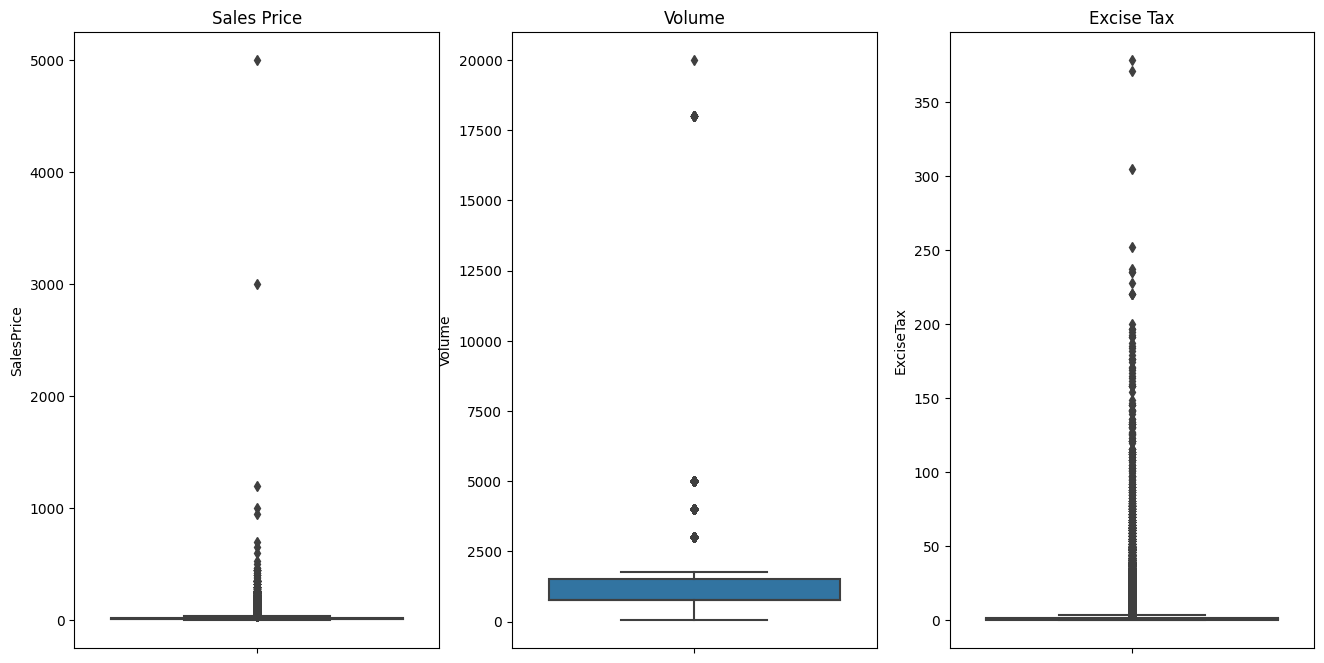

In [69]:
plt.figure(figsize = (16,8))
plt.subplot(1, 3, 1)
sns.boxplot(y = sales['SalesPrice']).title.set_text('Sales Price')
plt.subplot(1, 3, 2)
sns.boxplot(y = sales['Volume']).title.set_text('Volume')
plt.subplot(1, 3, 3)
sns.boxplot(y = sales['ExciseTax']).title.set_text('Excise Tax')
plt.show()

In [70]:
#Group the sales by date
sales_by_date = sales.groupby(['SalesDate', 'DayOfWeek'])['SalesQuantity'].sum().reset_index()
sales_by_date = sales_by_date.sort_values('SalesDate')
sales_by_date

,SalesDate,DayOfWeek,SalesQuantity
0,2016-01-01,Friday,49911
1,2016-01-02,Saturday,93114
2,2016-01-03,Sunday,53037
3,2016-01-04,Monday,41341
4,2016-01-05,Tuesday,40831
5,2016-01-06,Wednesday,51358
6,2016-01-07,Thursday,59792
7,2016-01-08,Friday,97389
8,2016-01-09,Saturday,101690
9,2016-01-10,Sunday,46146


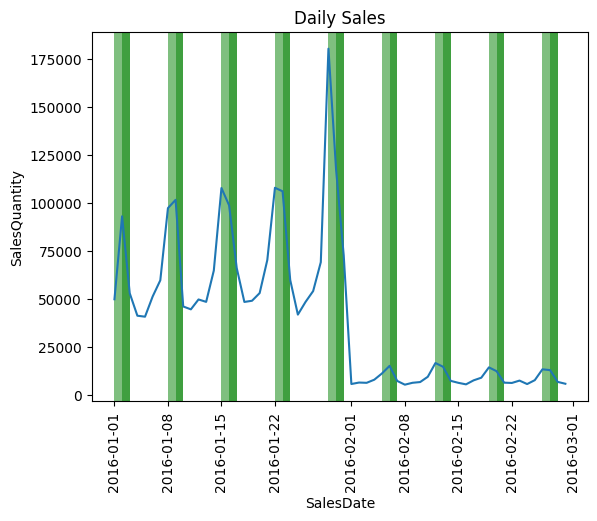

In [71]:
# Create line plot
x = sales_by_date['SalesDate']
y = sales_by_date['SalesQuantity']
for index, row in sales_by_date.iterrows():
    if row['DayOfWeek'] == 'Friday':
        plt.axvspan(row['SalesDate'], row['SalesDate'] + pd.Timedelta(days=2), facecolor='green', edgecolor='none', alpha=.5)
    if row['DayOfWeek'] == 'Saturday':
        plt.axvspan(row['SalesDate'], row['SalesDate'] + pd.Timedelta(days=1), facecolor='green', edgecolor='none', alpha=.5)
    if row['DayOfWeek'] == 'Sunday':
        plt.axvspan(row['SalesDate'], row['SalesDate'] + pd.Timedelta(days=0), facecolor='green', edgecolor='none', alpha=.5)

plt.plot(x, y)
plt.xticks(rotation = 90)
plt.xlabel('SalesDate')
plt.ylabel('SalesQuantity')
plt.title('Daily Sales')

plt.show()

<Axes: xlabel='DayOfWeek'>

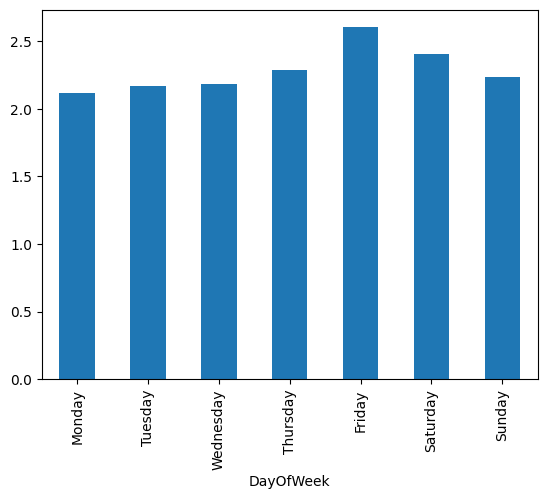

In [72]:
# Day of week variability
sales_grouped = sales.groupby(['WeekdayNum', 'DayOfWeek'])['SalesQuantity'].mean().reset_index(level=0, drop=True)
sales_grouped.plot.bar(x="DayOfWeek")

In [73]:
sales_by_date['rollMean'] = sales_by_date['SalesQuantity'].rolling(window=7).mean()
sales_by_date['rollStd'] = sales_by_date['SalesQuantity'].rolling(window=7).std()

In [74]:
print(sales_by_date.columns)

Index(['SalesDate', 'DayOfWeek', 'SalesQuantity', 'rollMean', 'rollStd'], dtype='object')


In [75]:
sales_by_date

,SalesDate,DayOfWeek,SalesQuantity,rollMean,rollStd
0,2016-01-01,Friday,49911,NaN,NaN
1,2016-01-02,Saturday,93114,NaN,NaN
2,2016-01-03,Sunday,53037,NaN,NaN
3,2016-01-04,Monday,41341,NaN,NaN
4,2016-01-05,Tuesday,40831,NaN,NaN
5,2016-01-06,Wednesday,51358,NaN,NaN
6,2016-01-07,Thursday,59792,55626.285714,17810.291591
7,2016-01-08,Friday,97389,62408.857143,23426.038955
8,2016-01-09,Saturday,101690,63634.000000,25437.411320
9,2016-01-10,Sunday,46146,62649.571429,26042.021829


<Axes: xlabel='SalesDate', ylabel='SalesQuantity'>

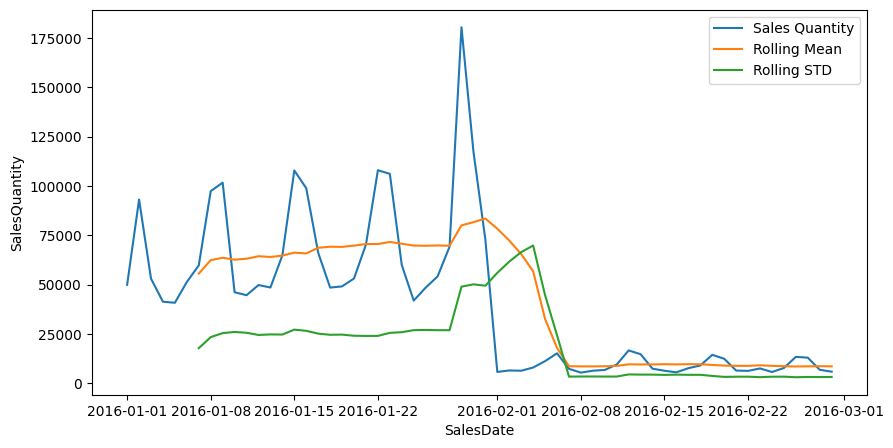

In [76]:
plt.figure(figsize=(10,5))
sns.lineplot(data = sales_by_date, x = 'SalesDate', y = 'SalesQuantity', label = 'Sales Quantity')
sns.lineplot(data = sales_by_date, x = 'SalesDate', y = 'rollMean', label = 'Rolling Mean')
sns.lineplot(data = sales_by_date, x = 'SalesDate', y = 'rollStd', label = 'Rolling STD')

The times series does not look stationary

In [77]:
from statsmodels.tsa.stattools import adfuller

Null Hypothesis: The series has a unit root i.e. the series is non-stationary

Reject the null hypothesis if:
a. The p-value is less than 0.05
b. The test statistics > critical value

In [78]:
adfTest = adfuller(sales_by_date['SalesQuantity'], autolag = 'AIC')

In [79]:
adfTest

(-0.687673886786026,
 0.8499164973101783,
 5,
 54,
 {'1%': -3.55770911573439,
  '5%': -2.9167703434435808,
  '10%': -2.59622219478738},
 1102.843369147171)

In [80]:
stats = pd.Series(adfTest[0:4], index = ['Test Statistic', 'p-value', '#lags used', 'number of observations used'])
stats

Test Statistic                 -0.687674
p-value                         0.849916
#lags used                      5.000000
number of observations used    54.000000
dtype: float64

In [81]:
for key, values in adfTest[4].items():
    print('criticality', key, ":", values)

criticality 1% : -3.55770911573439
criticality 5% : -2.9167703434435808
criticality 10% : -2.59622219478738


Hence we accept the null hypothesis that the series is non-stationary

# Making the Series Stationary

In [82]:
def test_stationarity(dataFrame, var):
    dataFrame['rollMean']  = dataFrame[var].rolling(window=7).mean()
    dataFrame['rollStd']  = dataFrame[var].rolling(window=7).std()
    
    from statsmodels.tsa.stattools import adfuller
    adfTest = adfuller(dataFrame[var],autolag='AIC')
    stats = pd.Series(adfTest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
    print(stats)
    
    for key, values in adfTest[4].items():
        print('criticality',key,":",values)
        
    sns.lineplot(data=dataFrame,x=dataFrame.index,y=var, label = 'Sales Quantity')
    sns.lineplot(data=dataFrame,x=dataFrame.index,y='rollMean', label = 'Rolling Mean')
    sns.lineplot(data=dataFrame,x=dataFrame.index,y='rollStd', label = 'Rolling STD')

In [83]:
sales_df = sales_by_date[['SalesDate', 'SalesQuantity']]
sales_df.head()

,SalesDate,SalesQuantity
0,2016-01-01,49911
1,2016-01-02,93114
2,2016-01-03,53037
3,2016-01-04,41341
4,2016-01-05,40831


# Time Shift Method

In [84]:
sales_df['shift'] = sales_df.SalesQuantity.shift()
sales_df['shiftDiff'] = sales_df.SalesQuantity - sales_df['shift']
sales_df.head()

/var/folders/cs/nn5g_ktx1jz7g3pfng685n4c0000gn/T/ipykernel_62588/2549133529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df['shift'] = sales_df.SalesQuantity.shift()
/var/folders/cs/nn5g_ktx1jz7g3pfng685n4c0000gn/T/ipykernel_62588/2549133529.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df['shiftDiff'] = sales_df.SalesQuantity - sales_df['shift']


,SalesDate,SalesQuantity,shift,shiftDiff
0,2016-01-01,49911,NaN,NaN
1,2016-01-02,93114,49911.0,43203.0
2,2016-01-03,53037,93114.0,-40077.0
3,2016-01-04,41341,53037.0,-11696.0
4,2016-01-05,40831,41341.0,-510.0


Test Statistic                -7.384324e+00
p-value                        8.313473e-11
#lags used                     4.000000e+00
number of observations used    5.400000e+01
dtype: float64
criticality 1% : -3.55770911573439
criticality 5% : -2.9167703434435808
criticality 10% : -2.59622219478738


/var/folders/cs/nn5g_ktx1jz7g3pfng685n4c0000gn/T/ipykernel_62588/1059668918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean']  = dataFrame[var].rolling(window=7).mean()
/var/folders/cs/nn5g_ktx1jz7g3pfng685n4c0000gn/T/ipykernel_62588/1059668918.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd']  = dataFrame[var].rolling(window=7).std()


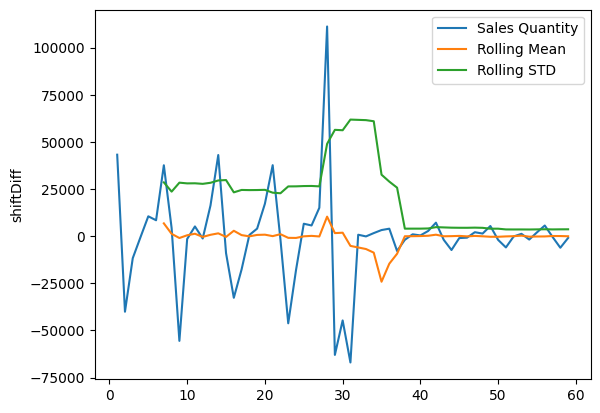

In [85]:
test_stationarity(sales_df.dropna(), 'shiftDiff')

Hence we can accept the null hypothesis that the series is non-stationary because the test statistics < critical value or reject the null hypothesis because the p-value is less than 0.05

# Log Transformation Method

In [86]:
log_df = sales_by_date[['SalesDate', 'SalesQuantity']]
log_df['log']=np.log(log_df['SalesQuantity'])
log_df.head()

/var/folders/cs/nn5g_ktx1jz7g3pfng685n4c0000gn/T/ipykernel_62588/2812867324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df['log']=np.log(log_df['SalesQuantity'])


,SalesDate,SalesQuantity,log
0,2016-01-01,49911,10.817997
1,2016-01-02,93114,11.441580
2,2016-01-03,53037,10.878745
3,2016-01-04,41341,10.629610
4,2016-01-05,40831,10.617197


/var/folders/cs/nn5g_ktx1jz7g3pfng685n4c0000gn/T/ipykernel_62588/1059668918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean']  = dataFrame[var].rolling(window=7).mean()


Test Statistic                 -1.138639
p-value                         0.699420
#lags used                      7.000000
number of observations used    52.000000
dtype: float64
criticality 1% : -3.562878534649522
criticality 5% : -2.918973284023669
criticality 10% : -2.597393446745562


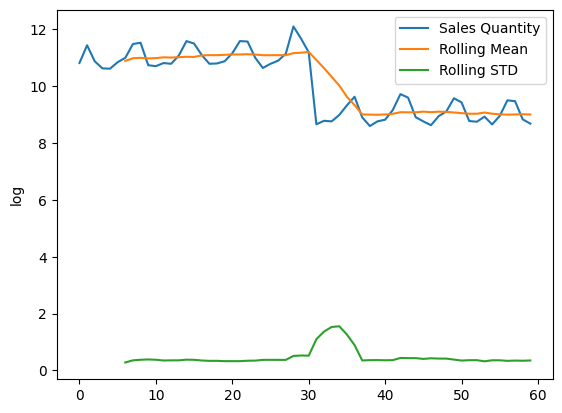

In [87]:
test_stationarity(log_df, 'log')

Hence we can reject the null hypothesis that the series is non-stationary because the test statistics > critical value or accept the null hypothesis because the p-value is greater than 0.05

# Sqrt Transformation Method

In [88]:
sqrt_df = sales_by_date[['SalesDate', 'SalesQuantity']]
sqrt_df['sqrt']=np.sqrt(sqrt_df['SalesQuantity'])
sqrt_df.head()

/var/folders/cs/nn5g_ktx1jz7g3pfng685n4c0000gn/T/ipykernel_62588/3979861248.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sqrt_df['sqrt']=np.sqrt(sqrt_df['SalesQuantity'])


,SalesDate,SalesQuantity,sqrt
0,2016-01-01,49911,223.407699
1,2016-01-02,93114,305.145867
2,2016-01-03,53037,230.297634
3,2016-01-04,41341,203.324863
4,2016-01-05,40831,202.066821


/var/folders/cs/nn5g_ktx1jz7g3pfng685n4c0000gn/T/ipykernel_62588/1059668918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean']  = dataFrame[var].rolling(window=7).mean()


Test Statistic                 -1.225641
p-value                         0.662469
#lags used                      7.000000
number of observations used    52.000000
dtype: float64
criticality 1% : -3.562878534649522
criticality 5% : -2.918973284023669
criticality 10% : -2.597393446745562


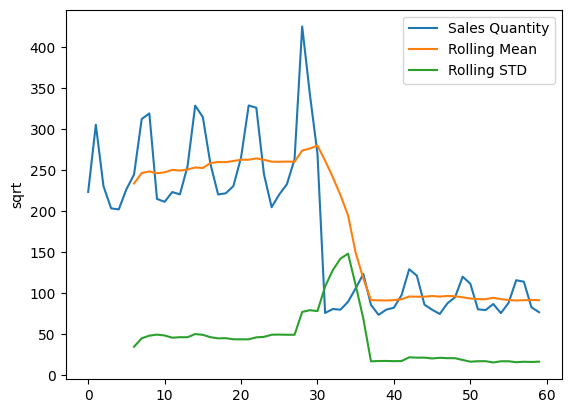

In [89]:
test_stationarity(sqrt_df, 'sqrt')

Hence we can reject the null hypothesis that the series is non-stationary because the test statistics > critical value or accept the null hypothesis because the p-value is greater than 0.05

# Cuberoot Transformation Method

In [90]:
cbrt_df = sales_by_date[['SalesDate', 'SalesQuantity']]
cbrt_df['cbrt']=np.cbrt(cbrt_df['SalesQuantity'])
cbrt_df.head()

/var/folders/cs/nn5g_ktx1jz7g3pfng685n4c0000gn/T/ipykernel_62588/2094363371.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cbrt_df['cbrt']=np.cbrt(cbrt_df['SalesQuantity'])


,SalesDate,SalesQuantity,cbrt
0,2016-01-01,49911,36.818443
1,2016-01-02,93114,45.325054
2,2016-01-03,53037,37.571597
3,2016-01-04,41341,34.577506
4,2016-01-05,40831,34.434729


/var/folders/cs/nn5g_ktx1jz7g3pfng685n4c0000gn/T/ipykernel_62588/1059668918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean']  = dataFrame[var].rolling(window=7).mean()


Test Statistic                 -1.220665
p-value                         0.664644
#lags used                      7.000000
number of observations used    52.000000
dtype: float64
criticality 1% : -3.562878534649522
criticality 5% : -2.918973284023669
criticality 10% : -2.597393446745562


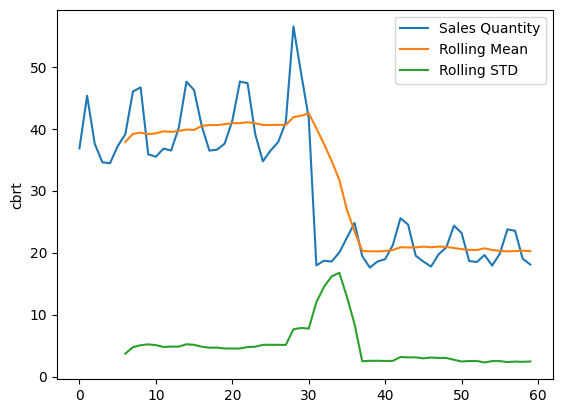

In [91]:
test_stationarity(cbrt_df, 'cbrt')

Hence we can reject the null hypothesis that the series is non-stationary because the test statistics > critical value or accept the null hypothesis because the p-value is greater than 0.05

In [92]:
log_df2 = log_df[['SalesDate', 'SalesQuantity', 'log']]
log_df2['log_sqrt'] = np.sqrt(log_df['log'])
log_df2.head()

/var/folders/cs/nn5g_ktx1jz7g3pfng685n4c0000gn/T/ipykernel_62588/4276448154.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df2['log_sqrt'] = np.sqrt(log_df['log'])


,SalesDate,SalesQuantity,log,log_sqrt
0,2016-01-01,49911,10.817997,3.289072
1,2016-01-02,93114,11.441580,3.382540
2,2016-01-03,53037,10.878745,3.298294
3,2016-01-04,41341,10.629610,3.260308
4,2016-01-05,40831,10.617197,3.258404


Test Statistic                 -1.122281
p-value                         0.706105
#lags used                      7.000000
number of observations used    52.000000
dtype: float64
criticality 1% : -3.562878534649522
criticality 5% : -2.918973284023669
criticality 10% : -2.597393446745562


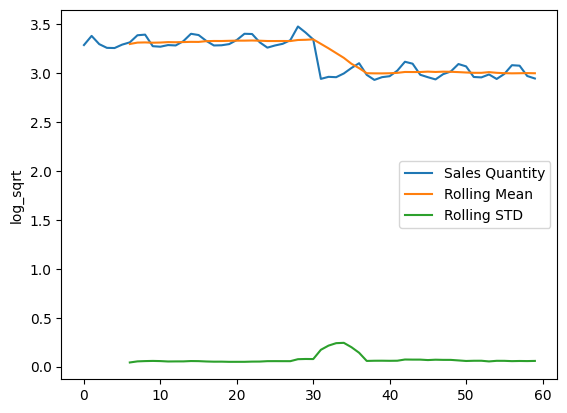

In [93]:
test_stationarity(log_df2, 'log_sqrt')

Hence we can reject the null hypothesis that the series is non-stationary because the test statistics > critical value or accept the null hypothesis because the p-value is greater than 0.05

In [94]:
log_df2 = log_df[['SalesDate', 'SalesQuantity', 'log']]
log_df2['log_sqrt'] = np.sqrt(log_df2['log'])
log_df2['logShiftDiff'] = log_df2['log_sqrt'] - log_df2['log_sqrt'].shift()
log_df2.head()

/var/folders/cs/nn5g_ktx1jz7g3pfng685n4c0000gn/T/ipykernel_62588/3145436002.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df2['log_sqrt'] = np.sqrt(log_df2['log'])


,SalesDate,SalesQuantity,log,log_sqrt,logShiftDiff
0,2016-01-01,49911,10.817997,3.289072,NaN
1,2016-01-02,93114,11.441580,3.382540,0.093468
2,2016-01-03,53037,10.878745,3.298294,-0.084246
3,2016-01-04,41341,10.629610,3.260308,-0.037986
4,2016-01-05,40831,10.617197,3.258404,-0.001904


Test Statistic                 -2.466623
p-value                         0.123808
#lags used                      6.000000
number of observations used    52.000000
dtype: float64
criticality 1% : -3.562878534649522
criticality 5% : -2.918973284023669
criticality 10% : -2.597393446745562


/var/folders/cs/nn5g_ktx1jz7g3pfng685n4c0000gn/T/ipykernel_62588/1059668918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean']  = dataFrame[var].rolling(window=7).mean()
/var/folders/cs/nn5g_ktx1jz7g3pfng685n4c0000gn/T/ipykernel_62588/1059668918.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd']  = dataFrame[var].rolling(window=7).std()


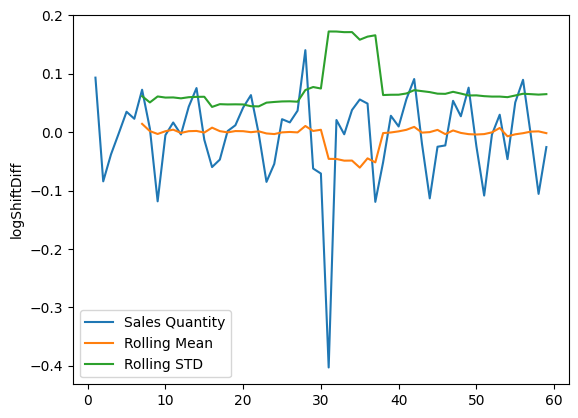

In [95]:
test_stationarity(log_df2.dropna(), 'logShiftDiff')

Hence we can reject the null hypothesis that the series is non-stationary because the test statistics > critical value or accept the null hypothesis because the p-value is greater than 0.05

In [96]:
log_df3 = log_df[['SalesDate', 'SalesQuantity', 'log']]
log_df3['log_cbrt'] = np.cbrt(log_df3['log'])
log_df3.head()
print(log_df3.columns)

/var/folders/cs/nn5g_ktx1jz7g3pfng685n4c0000gn/T/ipykernel_62588/3080660549.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df3['log_cbrt'] = np.cbrt(log_df3['log'])


Index(['SalesDate', 'SalesQuantity', 'log', 'log_cbrt'], dtype='object')


In [97]:
print(log_df3.columns)

Index(['SalesDate', 'SalesQuantity', 'log', 'log_cbrt'], dtype='object')


Test Statistic                 -1.116724
p-value                         0.708357
#lags used                      7.000000
number of observations used    52.000000
dtype: float64
criticality 1% : -3.562878534649522
criticality 5% : -2.918973284023669
criticality 10% : -2.597393446745562


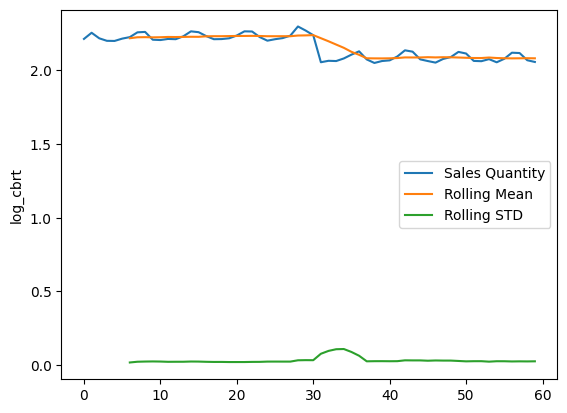

In [98]:
test_stationarity(log_df3, 'log_cbrt')

In [99]:
print(log_df3.columns)

Index(['SalesDate', 'SalesQuantity', 'log', 'log_cbrt', 'rollMean', 'rollStd'], dtype='object')


In [100]:
log_df3['rolling_mean'] = log_df3['log_cbrt'].rolling(window = 2).mean()
log_df3

,SalesDate,SalesQuantity,log,log_cbrt,rollMean,rollStd,rolling_mean
0,2016-01-01,49911,10.817997,2.211646,NaN,NaN,NaN
1,2016-01-02,93114,11.441580,2.253350,NaN,NaN,2.232498
2,2016-01-03,53037,10.878745,2.215778,NaN,NaN,2.234564
3,2016-01-04,41341,10.629610,2.198733,NaN,NaN,2.207255
4,2016-01-05,40831,10.617197,2.197877,NaN,NaN,2.198305
5,2016-01-06,51358,10.846576,2.213592,NaN,NaN,2.205734
6,2016-01-07,59792,10.998627,2.223888,2.216409,0.018742,2.218740
7,2016-01-08,97389,11.486469,2.256293,2.222787,0.023772,2.240090
8,2016-01-09,101690,11.529684,2.259119,2.223611,0.025073,2.257706
9,2016-01-10,46146,10.739566,2.206288,2.222256,0.025813,2.232704


Test Statistic                 -0.992441
p-value                         0.756011
#lags used                      6.000000
number of observations used    47.000000
dtype: float64
criticality 1% : -3.5778480370438146
criticality 5% : -2.925338105429433
criticality 10% : -2.6007735310095064


/var/folders/cs/nn5g_ktx1jz7g3pfng685n4c0000gn/T/ipykernel_62588/1059668918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean']  = dataFrame[var].rolling(window=7).mean()
/var/folders/cs/nn5g_ktx1jz7g3pfng685n4c0000gn/T/ipykernel_62588/1059668918.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd']  = dataFrame[var].rolling(window=7).std()


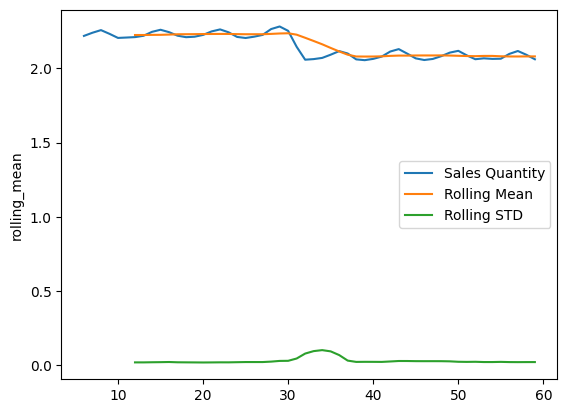

In [101]:
test_stationarity(log_df3.dropna(), 'rolling_mean')

So clearly, this data is not becoming stationary due to the structural break going into the new month. So to account. for the structural break appropriately, I will be including a dummy variable to help capture the change in the mean and variance.

In [102]:
# Create the dummy variable for structural break on '2016-02-01'
sales_by_date['Dummy'] = 0
sales_by_date.loc[sales_by_date['SalesDate'] >= pd.Timestamp('2016-02-01'), 'Dummy'] = 1
sales_by_date

,SalesDate,DayOfWeek,SalesQuantity,rollMean,rollStd,Dummy
0,2016-01-01,Friday,49911,NaN,NaN,0
1,2016-01-02,Saturday,93114,NaN,NaN,0
2,2016-01-03,Sunday,53037,NaN,NaN,0
3,2016-01-04,Monday,41341,NaN,NaN,0
4,2016-01-05,Tuesday,40831,NaN,NaN,0
5,2016-01-06,Wednesday,51358,NaN,NaN,0
6,2016-01-07,Thursday,59792,55626.285714,17810.291591,0
7,2016-01-08,Friday,97389,62408.857143,23426.038955,0
8,2016-01-09,Saturday,101690,63634.000000,25437.411320,0
9,2016-01-10,Sunday,46146,62649.571429,26042.021829,0


Due to the observed repeating patterns every week in the time series, with spikes during weekends, I will be using SARIMAX for my model

In [103]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/Users/chi-chi/miniconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


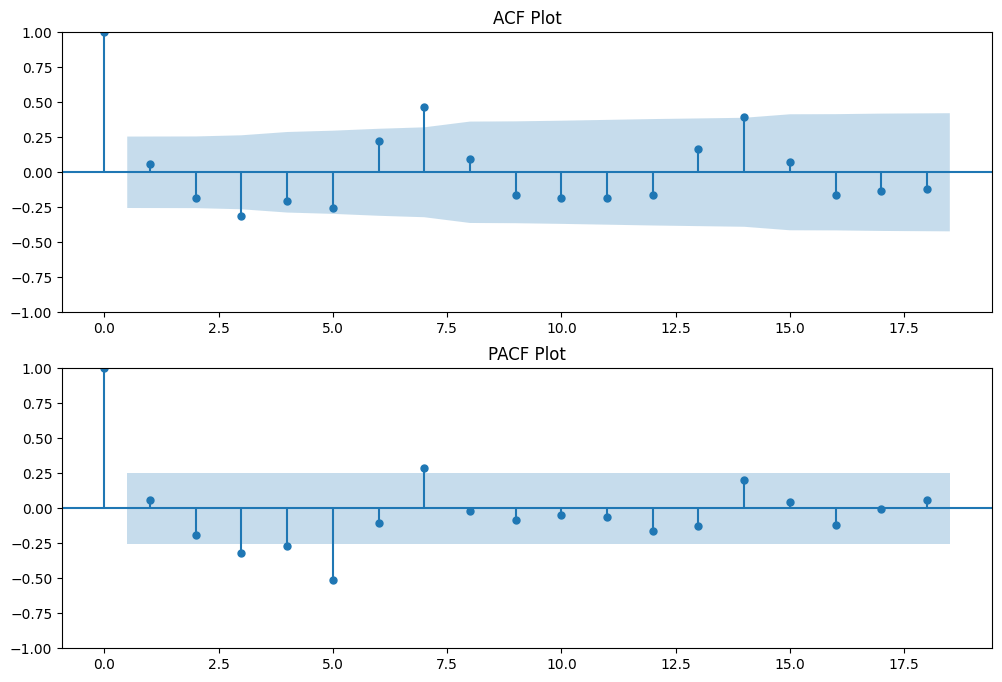

In [104]:
# Define the SARIMAX model parameters

# Plot ACF and PACF for non-seasonal lags
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# ACF plot
plot_acf(sales_by_date['SalesQuantity'].diff().dropna(), ax=ax[0])
ax[0].set_title('ACF Plot')

# PACF plot
plot_pacf(sales_by_date['SalesQuantity'].diff().dropna(), ax=ax[1])
ax[1].set_title('PACF Plot')

plt.show()

In [105]:
# ARIMA parameters
p, d, q = 4, 0, 3  

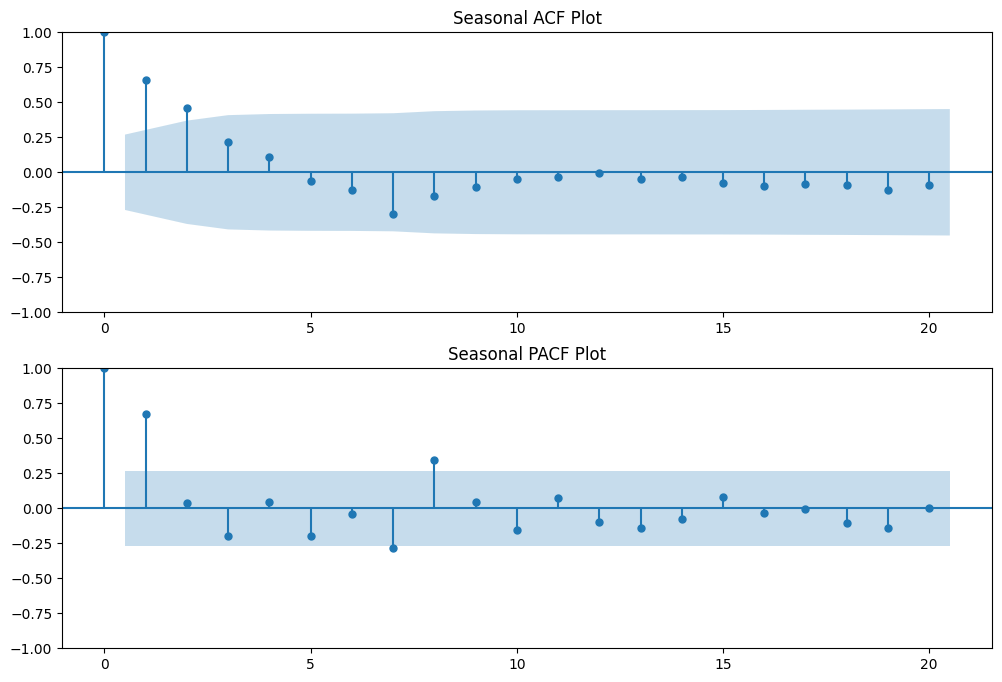

In [106]:
seasonality_period = 7  # Weekly seasonality for daily data

fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# ACF plot for seasonal lags
plot_acf(sales_by_date['SalesQuantity'].diff(seasonality_period).dropna(), lags=20, ax=ax[0])
ax[0].set_title('Seasonal ACF Plot')

# PACF plot for seasonal lags
plot_pacf(sales_by_date['SalesQuantity'].diff(seasonality_period).dropna(), lags=20, ax=ax[1])
ax[1].set_title('Seasonal PACF Plot')

plt.show()


In [107]:
# Seasonal parameters (s=7 for weekly seasonality)
P, D, Q, s = 7, 0, 2, 7 

In [108]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [109]:
train = sales_by_date[:round(len(sales_by_date)*70/100)]
test = sales_by_date[round(len(sales_by_date)*70/100):]
test.head()

,SalesDate,DayOfWeek,SalesQuantity,rollMean,rollStd,Dummy
42,2016-02-12,Friday,16691,9632.000000,4516.986901,1
43,2016-02-13,Saturday,14756,9565.857143,4423.972703,1
44,2016-02-14,Sunday,7406,9572.142857,4420.349286,1
45,2016-02-15,Monday,6387,9709.571429,4282.737865,1
46,2016-02-16,Tuesday,5588,9593.000000,4397.281130,1


In [110]:
train['SalesQuantity']

0      49911
1      93114
2      53037
3      41341
4      40831
5      51358
6      59792
7      97389
8     101690
9      46146
10     44654
11     49803
12     48556
13     64830
14    107858
15     98860
16     66170
17     48512
18     49128
19     53132
20     70333
21    107974
22    106146
23     59926
24     41917
25     48505
26     54176
27     69222
28    180426
29    117456
30     72766
31      5771
32      6529
33      6393
34      8018
35     11256
36     15219
37      7362
38      5425
39      6404
40      6787
41      9536
Name: SalesQuantity, dtype: int64

In [111]:
# Define the dummy as the exogenous variable
exog = train['Dummy']
exog

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    1
40    1
41    1
Name: Dummy, dtype: int64

In [112]:
# Define the exogenous test variable
exog_test = test['Dummy']
exog_test

42    1
43    1
44    1
45    1
46    1
47    1
48    1
49    1
50    1
51    1
52    1
53    1
54    1
55    1
56    1
57    1
58    1
59    1
Name: Dummy, dtype: int64

In [113]:
# Fit the SARIMAX model
model = SARIMAX(train['SalesQuantity'], order=(p, d, q), seasonal_order=(P, D, Q, s), exog=exog)
model_fit = model.fit()

/Users/chi-chi/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.16704D+01    |proj g|=  3.71613D-01

At iterate    5    f=  1.15579D+01    |proj g|=  1.64623D-02

At iterate   10    f=  1.15568D+01    |proj g|=  7.22135D-03

At iterate   15    f=  1.15508D+01    |proj g|=  1.52826D-02

At iterate   20    f=  1.15500D+01    |proj g|=  5.09861D-03

At iterate   25    f=  1.15492D+01    |proj g|=  2.74115D-03

At iterate   30    f=  1.15492D+01    |proj g|=  2.99504D-04

At iterate   35    f=  1.15492D+01    |proj g|=  1.53497D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

In [114]:
# Access the mle_retvals attribute
mle_retvals = model_fit.mle_retvals

# Print the contents of mle_retvals
print(mle_retvals)

{'fopt': 11.549194167600714, 'gopt': array([ 1.87814213e-06, -6.93525237e-06, -1.07876374e-05, -1.35644385e-05,
        8.06412714e-06,  1.43941747e-05, -6.88693547e-06,  1.95081284e-05,
        1.92766691e-05,  3.43174378e-06,  8.54729620e-06,  4.61461980e-06,
        8.21387403e-06,  1.24691368e-05,  5.67510483e-06, -1.55003121e-05,
        5.20650190e-06,  1.29217529e-05]), 'fcalls': 817, 'warnflag': 0, 'converged': True, 'iterations': 39}


In [115]:
# Print summary
print(model_fit.summary())

                                       SARIMAX Results                                        
Dep. Variable:                          SalesQuantity   No. Observations:                   42
Model:             SARIMAX(4, 0, 3)x(7, 0, [1, 2], 7)   Log Likelihood                -485.066
Date:                                Tue, 18 Jun 2024   AIC                           1006.132
Time:                                        12:34:11   BIC                           1037.410
Sample:                                             0   HQIC                          1017.597
                                                 - 42                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Dummy       8063.6343   5.59e+04      0.144      0.885   -1.02e+05    1.18e+05
ar.

In [116]:
prediction = model_fit.predict(start=test.index[0],end=test.index[-1], exog = exog_test)
sales_by_date['sarimaxPred'] = prediction

In [117]:
sales_by_date.dropna()

,SalesDate,DayOfWeek,SalesQuantity,rollMean,rollStd,Dummy,sarimaxPred
42,2016-02-12,Friday,16691,9632.000000,4516.986901,1,60907.751516
43,2016-02-13,Saturday,14756,9565.857143,4423.972703,1,34881.774140
44,2016-02-14,Sunday,7406,9572.142857,4420.349286,1,20818.372163
45,2016-02-15,Monday,6387,9709.571429,4282.737865,1,-11896.281728
46,2016-02-16,Tuesday,5588,9593.000000,4397.281130,1,-8683.288587
47,2016-02-17,Wednesday,7685,9721.285714,4314.087687,1,-8953.749032
48,2016-02-18,Thursday,9055,9652.571429,4321.355299,1,-8427.101510
49,2016-02-19,Friday,14438,9330.714286,3756.779992,1,4587.971702
50,2016-02-20,Saturday,12450,9001.285714,3271.516759,1,-1801.116195
51,2016-02-21,Sunday,6470,8867.571429,3365.368868,1,-1922.268886


<Axes: xlabel='SalesDate', ylabel='SalesQuantity'>

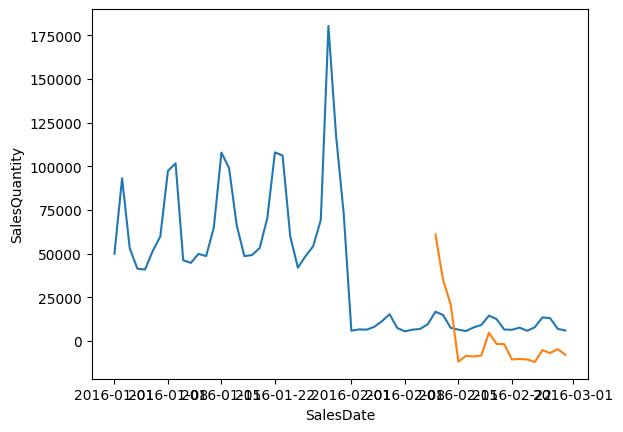

In [118]:
sns.lineplot(data=sales_by_date,x='SalesDate',y='SalesQuantity')
sns.lineplot(data=sales_by_date,x='SalesDate',y='sarimaxPred')

In [119]:
np.sqrt(mean_squared_error(test['SalesQuantity'],prediction))

18840.48574677884

In [120]:
mean_squared_error(test['SalesQuantity'],prediction)

354963903.1745765

In [121]:
prediction

42    60907.751516
43    34881.774140
44    20818.372163
45   -11896.281728
46    -8683.288587
47    -8953.749032
48    -8427.101510
49     4587.971702
50    -1801.116195
51    -1922.268886
52   -10664.026920
53   -10403.194986
54   -10687.572124
55   -12098.656846
56    -5338.145057
57    -7032.108577
58    -4709.191145
59    -8068.258333
Name: predicted_mean, dtype: float64

In [122]:
test['e'] = test['SalesQuantity'] - prediction

rmse = np.sqrt(np.mean(test['e']**2)).round(2)
mape = np.round(np.mean(np.abs(100*test['e']/test['SalesQuantity'])), 0)

print('RMSE = $', rmse)
print('MAPE =', mape, '%')

RMSE = $ 18840.49
MAPE = 200.0 %


/var/folders/cs/nn5g_ktx1jz7g3pfng685n4c0000gn/T/ipykernel_62588/274744905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['e'] = test['SalesQuantity'] - prediction


Not a good model.

#  Prophet Model

In [123]:
train_prophet = sales_by_date[:round(len(sales_by_date)*70/100)] \
    .rename(columns={'SalesDate':'ds',
                     'SalesQuantity':'y'})

In [124]:
test_prophet = sales_by_date[round(len(sales_by_date)*70/100):] \
    .rename(columns={'SalesDate':'ds',
                     'SalesQuantity':'y'})

In [125]:
test_prophet

,ds,DayOfWeek,y,rollMean,rollStd,Dummy,sarimaxPred
42,2016-02-12,Friday,16691,9632.000000,4516.986901,1,60907.751516
43,2016-02-13,Saturday,14756,9565.857143,4423.972703,1,34881.774140
44,2016-02-14,Sunday,7406,9572.142857,4420.349286,1,20818.372163
45,2016-02-15,Monday,6387,9709.571429,4282.737865,1,-11896.281728
46,2016-02-16,Tuesday,5588,9593.000000,4397.281130,1,-8683.288587
47,2016-02-17,Wednesday,7685,9721.285714,4314.087687,1,-8953.749032
48,2016-02-18,Thursday,9055,9652.571429,4321.355299,1,-8427.101510
49,2016-02-19,Friday,14438,9330.714286,3756.779992,1,4587.971702
50,2016-02-20,Saturday,12450,9001.285714,3271.516759,1,-1801.116195
51,2016-02-21,Sunday,6470,8867.571429,3365.368868,1,-1922.268886


In [126]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [127]:
from prophet import Prophet

In [128]:
%%time
prophet_model = Prophet()
prophet_model.fit(train_prophet)

12:34:14 - cmdstanpy - INFO - Chain [1] start processing
12:34:15 - cmdstanpy - INFO - Chain [1] done processing


CPU times: user 34.4 ms, sys: 24.5 ms, total: 58.9 ms
Wall time: 304 ms


In [129]:
# Predict on test set with model

test_fcst = prophet_model.predict(test_prophet)

In [130]:
test_fcst.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-02-12,31707.827447,31962.031581,99489.293883,31707.808118,31707.849309,34926.852616,34926.852616,34926.852616,34926.852616,34926.852616,34926.852616,0.0,0.0,0.0,66634.680063
1,2016-02-13,30653.401622,29103.181734,98520.630560,30653.333681,30653.474013,32260.360697,32260.360697,32260.360697,32260.360697,32260.360697,32260.360697,0.0,0.0,0.0,62913.762319
2,2016-02-14,29598.975796,-9616.861660,61634.405808,29598.843461,29599.120101,-4525.837755,-4525.837755,-4525.837755,-4525.837755,-4525.837755,-4525.837755,0.0,0.0,0.0,25073.138041
3,2016-02-15,28544.549971,-29978.726168,38409.719100,28544.325500,28544.769262,-23099.530891,-23099.530891,-23099.530891,-23099.530891,-23099.530891,-23099.530891,0.0,0.0,0.0,5445.019080
4,2016-02-16,27490.124146,-27070.418913,41333.533649,27489.806204,27490.431575,-19781.885462,-19781.885462,-19781.885462,-19781.885462,-19781.885462,-19781.885462,0.0,0.0,0.0,7708.238684


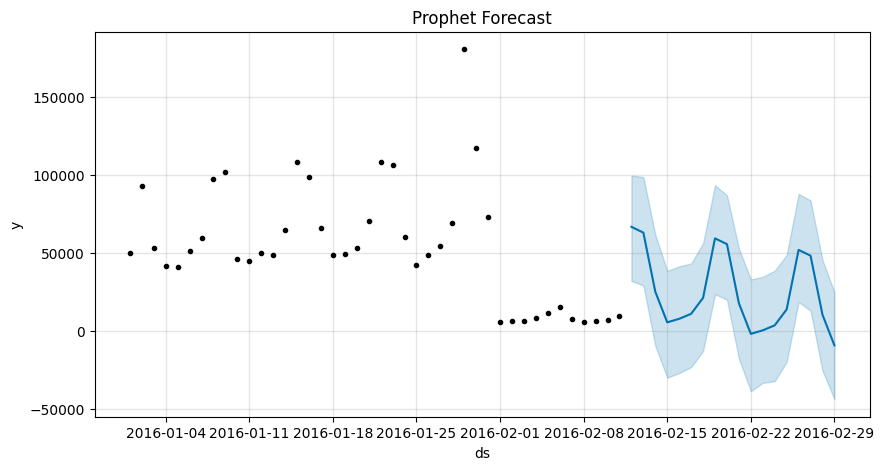

In [131]:
fig, ax = plt.subplots(figsize=(10, 5))
fig = prophet_model.plot(test_fcst, ax=ax)
ax.set_title('Prophet Forecast')
plt.show()

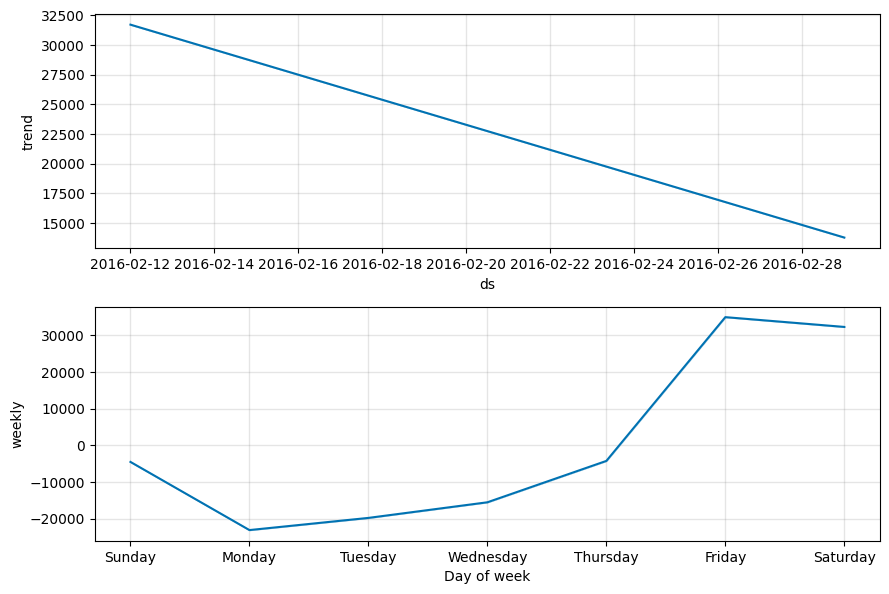

In [132]:
fig = prophet_model.plot_components(test_fcst)
plt.show()

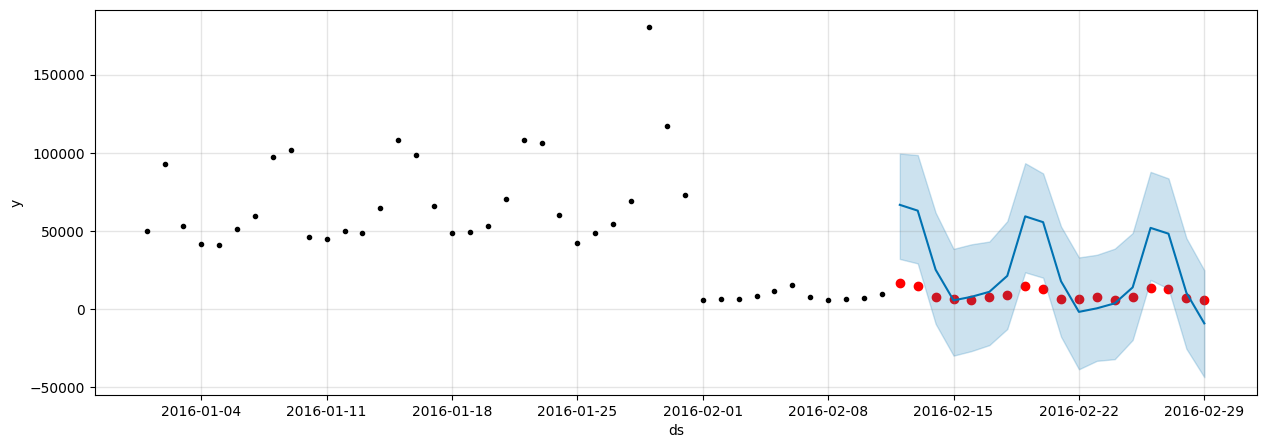

In [133]:
# Plot the forecast with the actuals
f, ax = plt.subplots(figsize=(15, 5))
ax.scatter(test_prophet['ds'], test_prophet['y'], color='r')
fig = prophet_model.plot(test_fcst, ax=ax)

# Evaluate the model with Error Metrics

In [134]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [135]:
np.sqrt(mean_squared_error(y_true=test_prophet['y'],
                   y_pred=test_fcst['yhat']))

26242.374419615455

In [136]:
mean_absolute_error(y_true=test_prophet['y'],
                   y_pred=test_fcst['yhat'])

19398.56198151372

In [137]:
mean_absolute_percentage_error(y_true=test_prophet['y'],
                   y_pred=test_fcst['yhat'])

1.7379789159568537

In [138]:
test_prophet.reset_index()['e'] = test_prophet.reset_index()['y'] - test_fcst['yhat']

rmse = np.sqrt(np.mean((test_prophet.reset_index()['y'] - test_fcst['yhat'])**2)).round(2)
mape = np.round(np.mean(np.abs(100*(test_prophet.reset_index()['y'] - test_fcst['yhat'])/test_prophet.reset_index()['y'])), 0)

print('RMSE = $', rmse)
print('MAPE =', mape, '%')

RMSE = $ 26242.37
MAPE = 174.0 %


# XGBoost Model

In [139]:
sales.head()

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName,DayOfWeek,WeekdayNum,dayofmonth,month,year
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2016-01-01,750,1,0.79,12546,JIM BEAM BRANDS COMPANY,Friday,5,1,1,2016
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,2016-01-02,750,1,1.57,12546,JIM BEAM BRANDS COMPANY,Saturday,6,2,1,2016
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2016-01-03,750,1,0.79,12546,JIM BEAM BRANDS COMPANY,Sunday,7,3,1,2016
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,2016-01-08,750,1,0.79,12546,JIM BEAM BRANDS COMPANY,Friday,5,8,1,2016
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,2016-01-09,375,1,0.79,12546,JIM BEAM BRANDS COMPANY,Saturday,6,9,1,2016


In [140]:
#Create a dataframe without the categorical variables
salescor = sales[['Store', 'Brand', 'SalesQuantity', 'SalesDollars', 'SalesPrice', 'Volume', 'Classification', 'ExciseTax', 'VendorNo', 'WeekdayNum', 'dayofmonth', 'month', 'year']]

In [141]:
#Correlation Matrix
cormat = salescor.corr()
round(cormat, 2)

,Store,Brand,SalesQuantity,SalesDollars,SalesPrice,Volume,Classification,ExciseTax,VendorNo,WeekdayNum,dayofmonth,month,year
Store,1.00,0.05,0.01,0.03,0.04,-0.03,0.06,-0.01,0.01,0.05,0.03,-0.40,NaN
Brand,0.05,1.00,-0.02,-0.03,-0.11,0.04,0.75,-0.20,0.02,0.01,0.02,-0.03,NaN
SalesQuantity,0.01,-0.02,1.00,0.63,-0.09,-0.07,-0.02,0.55,-0.02,0.02,0.03,-0.00,NaN
SalesDollars,0.03,-0.03,0.63,1.00,0.34,0.11,-0.04,0.67,-0.01,0.04,0.03,-0.01,NaN
SalesPrice,0.04,-0.11,-0.09,0.34,1.00,0.21,-0.13,0.12,0.02,0.03,0.02,-0.01,NaN
Volume,-0.03,0.04,-0.07,0.11,0.21,1.00,0.11,0.24,-0.01,-0.02,-0.01,0.01,NaN
Classification,0.06,0.75,-0.02,-0.04,-0.13,0.11,1.00,-0.25,-0.00,0.01,0.02,-0.04,NaN
ExciseTax,-0.01,-0.20,0.55,0.67,0.12,0.24,-0.25,1.00,-0.01,0.02,0.01,0.01,NaN
VendorNo,0.01,0.02,-0.02,-0.01,0.02,-0.01,-0.00,-0.01,1.00,0.01,0.00,0.00,NaN
WeekdayNum,0.05,0.01,0.02,0.04,0.03,-0.02,0.01,0.02,0.01,1.00,0.08,-0.05,NaN


In [142]:
from sklearn.model_selection import train_test_split

# Extract feature and target arrays
X, y = salescor.drop('SalesQuantity', axis=1), salescor[['SalesQuantity']]

In [143]:
# Extract text features
cats = X.select_dtypes(exclude=np.number).columns.tolist()
cats

['Store', 'Brand', 'Classification', 'VendorNo']

In [144]:
# Convert to Pandas category
for col in cats:
   X[col] = X[col].astype('category')

In [145]:
X.dtypes

Store             category
Brand             category
SalesDollars       float64
SalesPrice         float64
Volume               int64
Classification    category
ExciseTax          float64
VendorNo          category
WeekdayNum           int32
dayofmonth           int32
month                int32
year                 int32
dtype: object

In [146]:
# Split the data
X_train = X[:round(len(X)*70/100)]
y_train = y[:round(len(y)*70/100)]

X_test = X[round(len(X)*70/100):]
y_test = y[round(len(y)*70/100):]

In [147]:
pip install --user xgboost

Note: you may need to restart the kernel to use updated packages.


In [148]:
import xgboost as xgb

# Create regression matrices
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [149]:
# Define hyperparameters
params = {"objective": "reg:squarederror", "tree_method": "auto"}

In [150]:
n = 100
model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
)

In [151]:
preds = model.predict(dtest_reg)

In [152]:
rmse = mean_squared_error(y_test, preds, squared=False)

print(f"RMSE of the base model: {rmse:.3f}")

RMSE of the base model: 1.906


In [153]:
preds

array([ 0.9940712 ,  2.0181959 , 11.288195  , ...,  0.99778277,
        2.9403028 ,  1.9837174 ], dtype=float32)

In [154]:
y_test

,SalesQuantity
734002,1
734003,2
734004,11
734005,3
734006,3
...,...
1048570,4
1048571,8
1048572,1
1048573,3


In [155]:
pred_df = y_test.copy()
pred_df['preds'] = preds.tolist()
pred_df

,SalesQuantity,preds
734002,1,0.994071
734003,2,2.018196
734004,11,11.288195
734005,3,3.019546
734006,3,3.019546
...,...,...
1048570,4,4.072333
1048571,8,7.905189
1048572,1,0.997783
1048573,3,2.940303


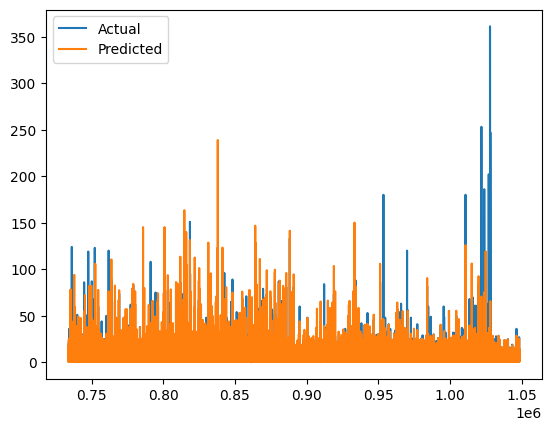

In [156]:
# Plot the predictions with the actuals
plt.plot(pred_df['SalesQuantity'], label = "Actual")
plt.plot(pred_df['preds'], label = "Predicted")
plt.legend()
plt.show()

In [157]:
importance = model.get_score(importance_type='weight')
print(importance.keys())

dict_keys(['Store', 'Brand', 'SalesDollars', 'SalesPrice', 'Volume', 'Classification', 'ExciseTax', 'VendorNo', 'WeekdayNum', 'dayofmonth'])


In [158]:
# Get feature importance from the model
importance = model.get_score(importance_type='weight')

# Ensure all features are accounted for by initializing importance dictionary with zero
all_features = X.columns.tolist()
importance_dict = {feature: 0 for feature in all_features}

# Update importance dictionary with actual values
for key in importance.keys():
    feature_name = key
    importance_dict[feature_name] = importance[key]

# Convert the importance dictionary to a DataFrame
importance_df = pd.DataFrame(list(importance_dict.items()), columns=['Feature', 'Importance'])

# Sort by importance
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

In [159]:
importance_df

,Feature,Importance
1,Brand,1679.0
2,SalesDollars,944.0
0,Store,799.0
6,ExciseTax,507.0
3,SalesPrice,274.0
9,dayofmonth,138.0
8,WeekdayNum,88.0
7,VendorNo,11.0
4,Volume,6.0
5,Classification,1.0


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

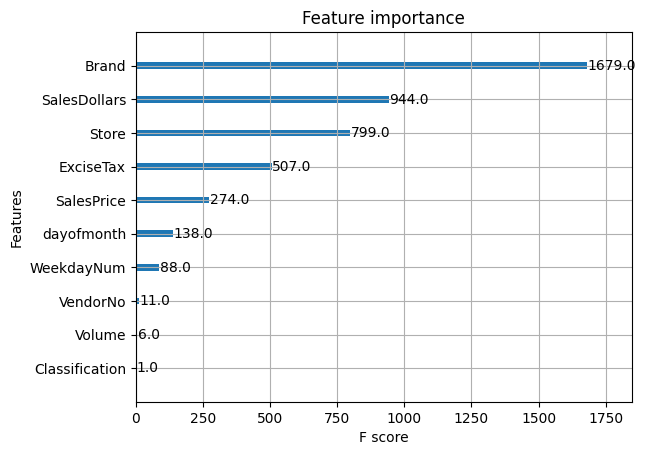

In [160]:
xgb.plot_importance(model)

In [161]:
# Save the model to a file in JSON format
model.save_model('xgboost_model.json')

In [177]:
# Print the absolute path
absolute_path = os.path.abspath('model')
print(f'Model saved at: {absolute_path}')

Model saved at: /Users/chi-chi/model


In [162]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [182]:
import streamlit as st
import xgboost as xgb
import pandas as pd
import numpy as np

# Load the trained XGBoost model
loaded_model = xgb.Booster()
loaded_model.load_model('/Users/chi-chi/xgboost_model.json')

# Define the features
features = ['Store', 'Brand', 'SalesDollars', 'SalesPrice', 'Volume', 'Classification', 'ExciseTax', 'VendorNo', 'WeekdayNum', 'dayofmonth', 'month', 'year']

# Dictionary to store user inputs
user_input = {}

st.title('Sales Quantity Forecasting')

# Create input fields for each feature
for feature in features:
    if feature in ['Store', 'Brand', 'Classification', 'VendorNo']:
        user_input[feature] = st.selectbox(f'Select {feature}', options=sales[feature].unique())
    else:
        user_input[feature] = float(st.number_input(f'Enter {feature}', value=float(sales[feature].mean())))

# Convert user inputs into a DataFrame
input_data = pd.DataFrame([user_input])

# Extract text features
cats = input_data.select_dtypes(exclude=np.number).columns.tolist()

# Convert to Pandas category
for col in cats:
   input_data[col] = input_data[col].astype('category')

# Create DMatrix for prediction
dmatrix = xgb.DMatrix(input_data, enable_categorical=True)

# Predict
prediction = loaded_model.predict(dmatrix)

st.write('### Forecasted Sales Quantity')
st.write(prediction[0])

if st.button('Show Feature Importance'):
    importance = loaded_model.get_score(importance_type='weight')
    importance_df = pd.DataFrame(list(importance.items()), columns=['Feature', 'Importance'])
    importance_df.sort_values(by='Importance', ascending=False, inplace=True)
    st.bar_chart(importance_df.set_index('Feature'))
